# 1. Importando arquivos.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

Mounted at /content/drive


In [ ]:
# Importando biblioteca Pandas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

#Foi necessário dividir os arquivos pra colocar no github, e então criar um link de cada parte.

# Links dos dados das commodities
url_commodities1 = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/df1.csv'
url_commodities2= 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/df2.csv'

# Links dos dados dos maiores parceiros comerciais
url_parceiros1 = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/df1M.csv'
url_parceiros2 = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/df2M.csv'

# Links dos dados de balança comercial
url_balanca1 = "https://raw.githubusercontent.com/HenriqueAlbanez/Projeto-EdenRed/150f4fd8007bbca2bbf5f0a419dafa9e48b0c1ec/df1.csv"
url_balanca2 = "https://raw.githubusercontent.com/HenriqueAlbanez/Projeto-EdenRed/main/df2%20(1).csv"
url_balanca3 = "https://raw.githubusercontent.com/HenriqueAlbanez/Projeto-EdenRed/main/df3.csv"

# Link dos dados de câmbio real-dólar (de jan/2010 a dez/2023)
url_cambio = 'https://raw.githubusercontent.com/HenriqueAlbanez/Projeto-EdenRed/main/USD_BRL%20Historical%20Data%20(1).csv'

# Link dos dados das commodities do Brasil e de seus maiores parceiros comerciais  (de jan/2022 a dez/2022)
url_brasil_2022 = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/Brasil_2022.csv'
url_china_2022     = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/China_2022.csv'
url_eua_2022       = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/USA_2022.csv'
url_argentina_2022 = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/Argentina_2022.csv'

#Link dos dados do PIB
url_pib = 'https://raw.githubusercontent.com/paranaero/dobootcamp/main/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26.csv'

url_completo = '/content/drive/MyDrive/Commodities2010-2022.csv'

## 1.2 Criando os dataframes

In [ ]:
# Função de transformação dos urls em dataframes

def cria_df(lista):   # O argumento da função é uma lista com os as variáveis url necessárias para criar o dataframe
  dfs_parciais = []
  for url in lista:    # Iteraçao sobre os urls
    df = pd.read_csv(url)    # Criamos o df do url
    dfs_parciais.append(df)  # E adicionamos ele numa lista

  df_inteiro = pd.concat(dfs_parciais)   # Criamos o df inteiro, com todos os adicionados no argumento da função cria_df

  return df_inteiro

In [ ]:
# Rejuntando os dataframes

df_commodities = cria_df([url_commodities1, url_commodities2])

df_parceiros   = cria_df([url_parceiros1, url_parceiros2])

df_balanca     = cria_df([url_balanca1, url_balanca2, url_balanca3])

df_cambio      = cria_df([url_cambio])

df_brasil_2022 = cria_df([url_brasil_2022])
df_china_2022  = cria_df([url_china_2022])
df_eua_2022    = cria_df([url_eua_2022])
df_argentina_2022 = cria_df([url_argentina_2022])

df_pib = cria_df([url_pib])

df_completo = cria_df([url_completo])

# 2. Visualizando, Formatando e Limpando dataframes

## Dataframe - Importação e Exportação de Commodities

In [ ]:
df_commodities

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2019,All Commodities,Export,8.704885e+08,NaN,No Quantity,NaN
1,Afghanistan,2019,All Commodities,Import,8.568014e+09,NaN,No Quantity,NaN
2,Afghanistan,2019,All Commodities,Re-Export,6.655197e+06,NaN,No Quantity,NaN
3,Afghanistan,2018,All Commodities,Import,7.406590e+09,NaN,No Quantity,NaN
4,Afghanistan,2018,All Commodities,Re-Export,9.263097e+06,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
5585,Zimbabwe,2000,All Commodities,Re-Export,3.202940e+07,NaN,No Quantity,NaN
5586,Zimbabwe,2000,All Commodities,Export,1.607053e+09,NaN,No Quantity,NaN
5587,Zimbabwe,2000,All Commodities,Import,2.016521e+09,NaN,No Quantity,NaN
5588,Zimbabwe,1995,All Commodities,Import,2.658853e+09,NaN,No Quantity,NaN


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_commodities.describe(), '\n')
print(df_commodities.info(), '\n')

# As colunas Weight e Quantity possuem somentes valores nulos
# A tabela contém dados de anos entre 1988 a 2022, mas não na mesma quantidade
print('Anos contidos na coluna "Year":', df_commodities['Year'].sort_values().unique())
year_counts = df_commodities['Year'].value_counts()
dict_year_counts = year_counts.to_dict()
sorted_dict_year_counts = dict(sorted(dict_year_counts.items()))
print('Quantidade de vezes de cada ano na coluna "Year":', sorted_dict_year_counts, '\n')

# Trade (USD) apresenta valores em dólar com notação científica

# As colunas 'Quantity Name' e 'Commodity' possuem apenas um elemento
print('Itens contidos na coluna "Quantity Name":', df_commodities['Quantity Name'].unique())
print('Itens contidos na coluna "Commodity":', df_commodities['Commodity'].unique())

               Year   Trade (USD)  Weight (kg)  Quantity
count  11180.000000  1.118000e+04          0.0       0.0
mean    2007.773882  7.852465e+10          NaN       NaN
std        8.487455  2.440685e+11          NaN       NaN
min     1988.000000  4.800000e+01          NaN       NaN
25%     2001.000000  6.607906e+08          NaN       NaN
50%     2008.000000  5.346453e+09          NaN       NaN
75%     2015.000000  4.058362e+10          NaN       NaN
max     2022.000000  3.593601e+12          NaN       NaN 

<class 'pandas.core.frame.DataFrame'>
Index: 11180 entries, 0 to 5589
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  11180 non-null  object 
 1   Year             11180 non-null  int64  
 2   Commodity        11180 non-null  object 
 3   Flow             11180 non-null  object 
 4   Trade (USD)      11180 non-null  float64
 5   Weight (kg)      0 non-null      float64
 6   Quantity N

In [ ]:
# Ajustando a formatação da coluna 'Trade (USD)' para um float sem casas decimais e com a "," como separador de milhar
# Função 'pd.set_option' aqui muda a formatação de todos os valores float no código
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_commodities

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2019,All Commodities,Export,870488512.46,NaN,No Quantity,NaN
1,Afghanistan,2019,All Commodities,Import,8568013876.87,NaN,No Quantity,NaN
2,Afghanistan,2019,All Commodities,Re-Export,6655196.71,NaN,No Quantity,NaN
3,Afghanistan,2018,All Commodities,Import,7406590324.75,NaN,No Quantity,NaN
4,Afghanistan,2018,All Commodities,Re-Export,9263097.24,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
5585,Zimbabwe,2000,All Commodities,Re-Export,32029403.32,NaN,No Quantity,NaN
5586,Zimbabwe,2000,All Commodities,Export,1607052525.67,NaN,No Quantity,NaN
5587,Zimbabwe,2000,All Commodities,Import,2016521465.45,NaN,No Quantity,NaN
5588,Zimbabwe,1995,All Commodities,Import,2658853376.00,NaN,No Quantity,NaN


In [ ]:
# Removendo colunas 'Quantity', 'Quantity Name', 'Weight (kg)' e 'Commodity' do dataframe
df_commodities = df_commodities.drop(columns = ['Quantity', 'Quantity Name', 'Weight (kg)', 'Commodity'])
df_commodities

,Country or Area,Year,Flow,Trade (USD)
0,Afghanistan,2019,Export,870488512.46
1,Afghanistan,2019,Import,8568013876.87
2,Afghanistan,2019,Re-Export,6655196.71
3,Afghanistan,2018,Import,7406590324.75
4,Afghanistan,2018,Re-Export,9263097.24
...,...,...,...,...
5585,Zimbabwe,2000,Re-Export,32029403.32
5586,Zimbabwe,2000,Export,1607052525.67
5587,Zimbabwe,2000,Import,2016521465.45
5588,Zimbabwe,1995,Import,2658853376.00


In [ ]:
# Não há valores iguais a zero na coluna 'Trade USD'
teste = df_commodities['Trade (USD)'] == 0
teste = df_commodities[teste]
teste.shape

(0, 4)

In [ ]:
# Visualizando dataframe após formatação e limpeza dos dados
df_commodities

,Country or Area,Year,Flow,Trade (USD)
0,Afghanistan,2019,Export,870488512.46
1,Afghanistan,2019,Import,8568013876.87
2,Afghanistan,2019,Re-Export,6655196.71
3,Afghanistan,2018,Import,7406590324.75
4,Afghanistan,2018,Re-Export,9263097.24
...,...,...,...,...
5585,Zimbabwe,2000,Re-Export,32029403.32
5586,Zimbabwe,2000,Export,1607052525.67
5587,Zimbabwe,2000,Import,2016521465.45
5588,Zimbabwe,1995,Import,2658853376.00


## Dataframe - Parceiros Comerciais

In [ ]:
df_parceiros

,Zone code,Region/Countries/Area,Year,Series,Major trading partner 1 (% of exports),Major trading partner 1 (% of exports) footnote,Value,Footnotes,Source
0,4,Afghanistan,2010,Major trading partner 1 (% of exports),Pakistan,NaN,39.00,NaN,"United Nations Statistics Division, New York, ..."
1,4,Afghanistan,2015,Major trading partner 1 (% of exports),Pakistan,NaN,39.70,NaN,"United Nations Statistics Division, New York, ..."
2,4,Afghanistan,2022,Major trading partner 1 (% of exports),Pakistan,NaN,34.60,Estimate.,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2010,Major trading partner 1 (% of imports),United Arab Emirates,NaN,2.00,NaN,"United Nations Statistics Division, New York, ..."
4,4,Afghanistan,2015,Major trading partner 1 (% of imports),United Arab Emirates,NaN,4.20,NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...,...,...
1840,716,Zimbabwe,2015,Major trading partner 3 (% of exports),Mozambique,NaN,12.00,Estimate.,"United Nations Statistics Division, New York, ..."
1841,716,Zimbabwe,2022,Major trading partner 3 (% of exports),Mozambique,NaN,8.40,Estimate.,"United Nations Statistics Division, New York, ..."
1842,716,Zimbabwe,2010,Major trading partner 3 (% of imports),China,NaN,5.50,NaN,"United Nations Statistics Division, New York, ..."
1843,716,Zimbabwe,2015,Major trading partner 3 (% of imports),China,NaN,7.70,NaN,"United Nations Statistics Division, New York, ..."


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_parceiros.describe(), '\n')
print(df_parceiros.info(), '\n')

# A tabela possui dados dos anos de 2010, 2015 e 2022 para a grande maioria dos paises
print('Anos contidos na coluna "Year":', sorted(df_parceiros['Year'].unique()))
year_counts = df_parceiros['Year'].value_counts()
dict_year_counts = year_counts.to_dict()
sorted_dict_year_counts = dict(sorted(dict_year_counts.items()))
print('Quantidade de vezes de cada ano na coluna "Year":', sorted_dict_year_counts, '\n')

# A maioria dos elementos nas colunas 'Major trading partner 1 (% of exports) footnote' e 'footnotes' são nulos ou irrelevantes para a análise
print('Elementos contidos na coluna "Major trading partner 1 (% of exports) footnote":', df_parceiros['Major trading partner 1 (% of exports) footnote'].unique())
print('Elementos contidos na coluna "Footnotes":', df_parceiros['Footnotes'].value_counts(), '\n')

# Source só possui um elemento, ou seja, todas as informações provém da mesma fonte, o que é irrelevante para a nossa análise
print('Elementos contidos na coluna "Source":', df_parceiros['Source'].value_counts())

# A nome da coluna 'Major trading partner 1 (% of exports)' não faz sentido, uma vez que a coluna 'Series' já informa a categoria do parceiro (impo/expo e classificação)

       Zone code    Year   Value
count    3690.00 3690.00 3690.00
mean      426.52 2015.75   16.01
std       253.45    4.93   15.30
min         4.00 2010.00    0.00
25%       208.00 2010.00    6.90
50%       418.00 2015.00   11.50
75%       643.00 2022.00   19.60
max       894.00 2022.00   99.70 

<class 'pandas.core.frame.DataFrame'>
Index: 3690 entries, 0 to 1844
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Zone code                                        3690 non-null   int64  
 1   Region/Countries/Area                            3690 non-null   object 
 2   Year                                             3690 non-null   int64  
 3   Series                                           3690 non-null   object 
 4   Major trading partner 1 (% of exports)           3690 non-null   object 
 5   Major trading partner 1 (% of exports) footnote  

In [ ]:
# Removendo colunas 'Major trading partner 1 (% of exports) footnote', 'Footnotes' e 'Source' do dataframe
df_parceiros = df_parceiros.drop(columns = ['Major trading partner 1 (% of exports) footnote', 'Footnotes', 'Source'])
df_parceiros

,Zone code,Region/Countries/Area,Year,Series,Major trading partner 1 (% of exports),Value
0,4,Afghanistan,2010,Major trading partner 1 (% of exports),Pakistan,39.00
1,4,Afghanistan,2015,Major trading partner 1 (% of exports),Pakistan,39.70
2,4,Afghanistan,2022,Major trading partner 1 (% of exports),Pakistan,34.60
3,4,Afghanistan,2010,Major trading partner 1 (% of imports),United Arab Emirates,2.00
4,4,Afghanistan,2015,Major trading partner 1 (% of imports),United Arab Emirates,4.20
...,...,...,...,...,...,...
1840,716,Zimbabwe,2015,Major trading partner 3 (% of exports),Mozambique,12.00
1841,716,Zimbabwe,2022,Major trading partner 3 (% of exports),Mozambique,8.40
1842,716,Zimbabwe,2010,Major trading partner 3 (% of imports),China,5.50
1843,716,Zimbabwe,2015,Major trading partner 3 (% of imports),China,7.70


In [ ]:
# Há 44 linhas nas quais 'Value' é igual a zero
teste = df_parceiros['Value'] == 0
teste = df_parceiros[teste]
print(teste.shape)

# Excluindo estas linhas, visto que não serão úteis na análise por serem nulas
print(df_parceiros.shape)
df_parceiros = df_parceiros[df_parceiros['Value'] != 0]
print(df_parceiros.shape)

(44, 6)
(3690, 6)
(3646, 6)


In [ ]:
# Renomeando a coluna 'Major trading partner 1 (% of exports)' e 'Value'
df_parceiros = df_parceiros.rename(columns={'Major trading partner 1 (% of exports)': 'Partner', 'Value' : 'Value (%)'})

In [ ]:
# Visualizando dataframe após formatação e limpeza dos dados
df_parceiros

,Zone code,Region/Countries/Area,Year,Series,Partner,Value (%)
0,4,Afghanistan,2010,Major trading partner 1 (% of exports),Pakistan,39.00
1,4,Afghanistan,2015,Major trading partner 1 (% of exports),Pakistan,39.70
2,4,Afghanistan,2022,Major trading partner 1 (% of exports),Pakistan,34.60
3,4,Afghanistan,2010,Major trading partner 1 (% of imports),United Arab Emirates,2.00
4,4,Afghanistan,2015,Major trading partner 1 (% of imports),United Arab Emirates,4.20
...,...,...,...,...,...,...
1840,716,Zimbabwe,2015,Major trading partner 3 (% of exports),Mozambique,12.00
1841,716,Zimbabwe,2022,Major trading partner 3 (% of exports),Mozambique,8.40
1842,716,Zimbabwe,2010,Major trading partner 3 (% of imports),China,5.50
1843,716,Zimbabwe,2015,Major trading partner 3 (% of imports),China,7.70


## Dataframa - Balança Comercial

In [ ]:
df_balanca

,Zone code,Region/Countries/Area,Year,Series,System of trade,System of trade footnote,Value,Footnotes,Source
0,1,"Total, all countries or areas",1995,Imports CIF (millions of US dollars),NaN,NaN,"5,099,057",NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",2005,Imports CIF (millions of US dollars),NaN,NaN,"10,577,013",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2010,Imports CIF (millions of US dollars),NaN,NaN,"15,275,115",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2015,Imports CIF (millions of US dollars),NaN,NaN,"16,482,346",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2020,Imports CIF (millions of US dollars),NaN,NaN,"17,598,001",NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...,...,...
1048,716,Zimbabwe,2010,Balance imports/exports (millions of US dollars),G,NaN,"-2,653",NaN,"United Nations Statistics Division, New York, ..."
1049,716,Zimbabwe,2015,Balance imports/exports (millions of US dollars),G,NaN,"-2,642",NaN,"United Nations Statistics Division, New York, ..."
1050,716,Zimbabwe,2020,Balance imports/exports (millions of US dollars),G,NaN,-653,NaN,"United Nations Statistics Division, New York, ..."
1051,716,Zimbabwe,2021,Balance imports/exports (millions of US dollars),G,NaN,"-1,541",NaN,"United Nations Statistics Division, New York, ..."


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_balanca.describe(), '\n')
print(df_balanca.info(), '\n')

# Elementos da coluna 'Value' estão com Dtype 'object'

# Coluna 'System of trade footnote' só possui elementos nulos

# Coluna 'Source' só possui um valor, sendo irrelevante para a nossa análise
print ('Elementos na coluna "Source":', df_balanca.Source.unique(), '\n')

# Elementos da coluna 'Footnotes' são relevantes?
print ('Elementos na coluna "Footnotes":', df_balanca.Footnotes.unique(), '\n')

# Elementos da coluna 'System of Trade' são irrelevantes, uma vez que não sabemos o que significam
print('Elementos na coluna "System of trade":', df_balanca['System of trade'].unique(), '\n')

       Zone code    Year  System of trade footnote
count    5053.00 5053.00                      0.00
mean      385.37 2012.62                       NaN
std       266.75    9.17                       NaN
min         1.00 1995.00                       NaN
25%       145.00 2005.00                       NaN
50%       372.00 2015.00                       NaN
75%       616.00 2021.00                       NaN
max       894.00 2022.00                       NaN 

<class 'pandas.core.frame.DataFrame'>
Index: 5053 entries, 0 to 1052
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone code                 5053 non-null   int64  
 1   Region/Countries/Area     5053 non-null   object 
 2   Year                      5053 non-null   int64  
 3   Series                    5053 non-null   object 
 4   System of trade           4381 non-null   object 
 5   System of trade footnote  0 non-null      float6

In [ ]:
# Transformando valores da coluna 'Value' em int

df_balanca['Value'] = df_balanca['Value'].str.replace(',', '').astype(int)
df_balanca

,Zone code,Region/Countries/Area,Year,Series,System of trade,System of trade footnote,Value,Footnotes,Source
0,1,"Total, all countries or areas",1995,Imports CIF (millions of US dollars),NaN,NaN,5099057,NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",2005,Imports CIF (millions of US dollars),NaN,NaN,10577013,NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2010,Imports CIF (millions of US dollars),NaN,NaN,15275115,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2015,Imports CIF (millions of US dollars),NaN,NaN,16482346,NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2020,Imports CIF (millions of US dollars),NaN,NaN,17598001,NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...,...,...
1048,716,Zimbabwe,2010,Balance imports/exports (millions of US dollars),G,NaN,-2653,NaN,"United Nations Statistics Division, New York, ..."
1049,716,Zimbabwe,2015,Balance imports/exports (millions of US dollars),G,NaN,-2642,NaN,"United Nations Statistics Division, New York, ..."
1050,716,Zimbabwe,2020,Balance imports/exports (millions of US dollars),G,NaN,-653,NaN,"United Nations Statistics Division, New York, ..."
1051,716,Zimbabwe,2021,Balance imports/exports (millions of US dollars),G,NaN,-1541,NaN,"United Nations Statistics Division, New York, ..."


In [ ]:
# Tirando '(millions of US dollars)' dos elementos da coluna 'Series'
print(df_balanca.Series.unique())
df_balanca['Series'] = df_balanca['Series'].str.replace('(millions of US dollars)', '')
print(df_balanca.Series.unique())

# CIF (Cost, Insurance, and Freight) - termo usado no comércio internacional para indicar que
#... o preço cotado de uma mercadoria inclui o custo do produto, o seguro de transporte e o frete para o porto de destino

# FOB (Free On Board) - indica que o preço cotado de uma mercadoria inclui apenas o custo do produto
#... e o custo de carregamento no navio ou transporte no ponto de origem especificado.
#... Comprador assume a responsabilidade e os custos de transporte e seguro da mercadoria a partir do ponto de origem especificado

['Imports CIF (millions of US dollars)'
 'Exports FOB (millions of US dollars)'
 'Balance imports/exports (millions of US dollars)']
['Imports CIF ' 'Exports FOB ' 'Balance imports/exports ']


In [ ]:
# Renomeando coluna 'Value' para 'Value ((millions of US dollars)'
df_balanca = df_balanca.rename(columns={'Value':'Value (millions of US dollars)'})

In [ ]:
# Removendo colunas 'System of trade footnote', 'System of trade', 'Footnotes' e 'Source' do dataframe
df_balanca = df_balanca.drop(columns = ['System of trade footnote', 'System of trade', 'Footnotes', 'Source'])

In [ ]:
# Visualizando dataframe após formatação e limpeza dos dados
df_balanca

,Zone code,Region/Countries/Area,Year,Series,Value (millions of US dollars)
0,1,"Total, all countries or areas",1995,Imports CIF,5099057
1,1,"Total, all countries or areas",2005,Imports CIF,10577013
2,1,"Total, all countries or areas",2010,Imports CIF,15275115
3,1,"Total, all countries or areas",2015,Imports CIF,16482346
4,1,"Total, all countries or areas",2020,Imports CIF,17598001
...,...,...,...,...,...
1048,716,Zimbabwe,2010,Balance imports/exports,-2653
1049,716,Zimbabwe,2015,Balance imports/exports,-2642
1050,716,Zimbabwe,2020,Balance imports/exports,-653
1051,716,Zimbabwe,2021,Balance imports/exports,-1541


## Dataframe - Câmbio Real/Dólar (de 01/jan/2010 a 31/dez/2023)

In [ ]:
df_cambio

,Date,Price,Open,High,Low,Vol.,Change %
0,12/28/2023,4.85,4.83,4.87,4.82,NaN,0.53%
1,12/27/2023,4.83,4.81,4.84,4.80,NaN,0.26%
2,12/26/2023,4.81,4.85,4.86,4.81,NaN,-0.92%
3,12/22/2023,4.86,4.89,4.89,4.85,NaN,-0.53%
4,12/21/2023,4.88,4.91,4.91,4.86,NaN,-0.65%
...,...,...,...,...,...,...,...
3641,01/07/2010,1.75,1.73,1.75,1.73,NaN,0.81%
3642,01/06/2010,1.73,1.73,1.74,1.72,NaN,0.09%
3643,01/05/2010,1.73,1.72,1.74,1.71,NaN,0.57%
3644,01/04/2010,1.72,1.73,1.73,1.72,NaN,-1.25%


In [ ]:
# Analisando estatísticas e informações do dataframe

df_cambio.describe()
df_cambio.info()

# Coluna 'Date' possui elementos do tipo 'object'

# Coluna 'Vol.' possui muitos nulos e elementos do tipo 'object'
print('Número de elementos nulos da coluna "Vol."', df_cambio['Vol.'].isna().sum())

# Coluna 'Change' possui elementos do tipo 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3646 non-null   object 
 1   Price     3646 non-null   float64
 2   Open      3646 non-null   float64
 3   High      3646 non-null   float64
 4   Low       3646 non-null   float64
 5   Vol.      1032 non-null   object 
 6   Change %  3646 non-null   object 
dtypes: float64(4), object(3)
memory usage: 199.5+ KB
Número de elementos nulos da coluna "Vol." 2614


In [ ]:
# Trocando dtype dos elementos da coluna 'Date' para 'date'
df_cambio['Date'] = pd.to_datetime(df_cambio['Date'])

# Trocando o dtype das colunas "Change %" e "Vol."
df_cambio['Change %'] = df_cambio['Change %'].str.replace('%', '').astype(float)
df_cambio['Vol.'] = df_cambio['Vol.'].str.replace('K', '').astype(float)

# Renomeando coluna 'Vol.'
df_cambio.rename(columns={'Vol.': 'Vol. (thousands of dollars)'}, inplace=True)

# Visualizando dataframe após formatação e limpeza dos dados
df_cambio['Date'] = df_cambio.Date.dt.strftime('%Y - %m')
df_cambio.head()


,Date,Price,Open,High,Low,Vol. (thousands of dollars),Change %
0,2023 - 12,4.85,4.83,4.87,4.82,NaN,0.53
1,2023 - 12,4.83,4.81,4.84,4.80,NaN,0.26
2,2023 - 12,4.81,4.85,4.86,4.81,NaN,-0.92
3,2023 - 12,4.86,4.89,4.89,4.85,NaN,-0.53
4,2023 - 12,4.88,4.91,4.91,4.86,NaN,-0.65


## Dataframe - Commodities do Brasil em 2022

In [ ]:
df_brasil_2022

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,Brazil,2022,"Horses; live, pure-bred breeding animals",Export,4608118.00,83647.00,No Quantity,NaN,1
1,Brazil,2022,"Horses; live, pure-bred breeding animals",Import,5776058.00,82110.00,Number of items,186.00,1
2,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Export,4214048.00,132206.64,No Quantity,NaN,1
3,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Import,3234706.00,49400.00,Number of items,104.00,1
4,Brazil,2022,Asses; live,Export,12111.00,NaN,No Quantity,NaN,1
...,...,...,...,...,...,...,...,...,...
9675,Brazil,2022,Antiques; of an age exceeding 250 years,Import,8648.00,50.00,Weight in kilograms,50.00,97
9676,Brazil,2022,Antiques; of an age exceeding 100 years but no...,Export,297994.00,24454.33,Weight in kilograms,24454.33,97
9677,Brazil,2022,Antiques; of an age exceeding 100 years but no...,Import,57438.00,11693.20,Weight in kilograms,11693.20,97
9678,Brazil,2022,Commodities not specified according to kind,Export,776860283.00,NaN,No Quantity,NaN,99


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_brasil_2022.describe(), '\n\n')
print(df_brasil_2022.info(), '\n\n')
#As colunas estão no formato correto.


#Não são necessárias as colunas 'Year' e 'Country or Area'
df_brasil_2022 = df_brasil_2022.drop(columns = ['Year', 'Country or Area', 'code', 'Weight (kg)', 'Quantity', 'Quantity Name'])

#transformando os valores de notação científica
# pd.set_option('display.cientific_format', lambda x: '%.2f' % x)

#Esse arquivo n tem dados de re-Export
print(f'Valores únicos da coluna Flow: {df_brasil_2022.Flow.unique()}\n\n')

#Na análise exploratória uma commodity chamada 'Commodities not specified according to kind' apareceu como 7a maior.
#Como a atividade 4 pede as 3 maiores commodities, acho que não precisamos nos preocupar com ela.
df_brasil_2022[df_brasil_2022.Commodity == 'Commodities not specified according to kind']


#No DataFrame a maioria das comodites aparecem 2 vezes, uma pra exportação e outra pra importação.
#Porém, há 7 que aparecem mais que 2 vezes. Pensei que somadas dessem algum resultado significativo.
#Mas, comparando essas 7 com as 5 maiores comodites, conclui que as 7 são irrelevantes para a atividade 4.

         Year    Trade (USD)    Weight (kg)       Quantity    code
count 9680.00        9680.00        9363.00        9252.00 9680.00
mean  2022.00    64620757.67    48182418.72    50829504.78   54.67
std      0.00   813571229.44  1091204405.66  1158434190.45   27.58
min   2022.00           1.00           0.00           0.00    1.00
25%   2022.00      157882.50       11752.72        5089.25   29.00
50%   2022.00     1974912.50      195795.63      133606.10   58.00
75%   2022.00    14774722.00     2150579.51     1940035.50   84.00
max   2022.00 46659054057.00 78928371809.90 79033652013.90   99.00 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  9680 non-null   object 
 1   Year             9680 non-null   int64  
 2   Commodity        9680 non-null   object 
 3   Flow             9680 non-null   object 
 4   Trade (

,Commodity,Flow,Trade (USD)
9678,Commodities not specified according to kind,Export,776860283.00
9679,Commodities not specified according to kind,Import,4356671098.00


## Dataframe - Commodities da China em 2022

In [ ]:
df_china_2022

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,China,2022,"Horses; live, pure-bred breeding animals",Export,12000.00,8000.00,Number of items,0.45,1
1,China,2022,"Horses; live, other than pure-bred breeding an...",Import,22984741.00,397620.00,Number of items,1009.82,1
2,China,2022,"Cattle; live, pure-bred breeding animals",Import,308076261.00,32994354.00,Number of items,176782.05,1
3,China,2022,"Cattle; live, other than pure-bred breeding an...",Import,496270391.00,66830976.00,Number of items,519612.76,1
4,China,2022,"Bovine animals; live, other than cattle and bu...",Export,53176960.00,8260791.00,Number of items,43995.40,1
...,...,...,...,...,...,...,...,...,...
10215,China,2022,Antiques; of an age exceeding 250 years,Export,143094822.00,4635.07,Weight in kilograms,4635.07,97
10216,China,2022,Antiques; of an age exceeding 100 years but no...,Export,103714719.00,2781.68,Weight in kilograms,2781.68,97
10217,China,2022,Antiques; of an age exceeding 100 years but no...,Import,57424127.00,206828.26,Weight in kilograms,206828.26,97
10218,China,2022,Commodities not specified according to kind,Export,45936444797.00,NaN,No Quantity,NaN,99


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_china_2022.describe(), '\n\n')
print(df_china_2022.info(), '\n\n')
#As colunas estão no formato correto.


#Não são necessárias as colunas 'Year' e 'Country or Area'
df_china_2022 = df_china_2022.drop(columns = ['Year', 'Country or Area'])

#transformando os valores de notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Esse arquivo n tem dados de re-Export
print(f'Valores únicos da coluna Flow: {df_china_2022.Flow.unique()}\n\n')

#Na análise exploratória uma commodity chamada 'Commodities not specified according to kind' não aparece entre as 5 maiores.
#Como a atividade 4 pede as 3 maiores commodities, não precisamos nos preocupar com ela.
df_china_2022[df_china_2022.Commodity == 'Commodities not specified according to kind']


#No DataFrame a maioria das comodites aparecem 2 vezes, uma pra exportação e outra pra importação.
#Porém, há 7 que aparecem mais que 2 vezes. Pensei que somadas dessem algum resultado significativo.
#Mas, comparando essas 7 com as 5 maiores comodites, conclui que as 7 são irrelevantes para a atividade 4.

          Year     Trade (USD)     Weight (kg)        Quantity     code
count 10220.00        10220.00         9999.00         9758.00 10220.00
mean   2022.00    617209602.05    334787351.40    583737288.10    54.38
std       0.00   5495236852.58  10694822144.69  12121617307.73    27.56
min    2022.00            1.00            0.00            0.00     1.00
25%    2022.00      4370430.50       316380.28       156310.48    29.00
50%    2022.00     39166376.00      3985869.68      2924586.32    56.00
75%    2022.00    234737632.50     34590908.32     33400120.43    84.00
max    2022.00 365512019551.00 904042318830.00 842162590632.43    99.00 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10220 entries, 0 to 10219
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  10220 non-null  object 
 1   Year             10220 non-null  int64  
 2   Commodity        10220 non-null  object 
 3   Flow  

,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
10218,Commodities not specified according to kind,Export,45936444797.00,NaN,No Quantity,NaN,99
10219,Commodities not specified according to kind,Import,7779074019.00,NaN,No Quantity,NaN,99


## Dataframe - Commodities dos EUA em 2022

In [ ]:
df_eua_2022

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,USA,2022,"Horses; live, pure-bred breeding animals",Export,181838604.00,2663713.13,Number of items,57378.00,1
1,USA,2022,"Horses; live, pure-bred breeding animals",Import,109366155.00,NaN,Number of items,2624.00,1
2,USA,2022,"Horses; live, pure-bred breeding animals",Re-Export,20532748.00,300779.64,Number of items,7383.00,1
3,USA,2022,"Horses; live, other than pure-bred breeding an...",Import,688352528.00,26359012.24,Number of items,25135.00,1
4,USA,2022,"Horses; live, other than pure-bred breeding an...",Export,111747912.00,2535467.79,Number of items,49416.00,1
...,...,...,...,...,...,...,...,...,...
15372,USA,2022,Antiques; of an age exceeding 100 years but no...,Export,324843139.00,146974.00,Weight in kilograms,146974.00,97
15373,USA,2022,Antiques; of an age exceeding 100 years but no...,Import,431952756.00,7347437.00,Weight in kilograms,7347437.00,97
15374,USA,2022,Commodities not specified according to kind,Re-Export,15224179498.00,NaN,No Quantity,NaN,99
15375,USA,2022,Commodities not specified according to kind,Import,117317647971.00,NaN,No Quantity,NaN,99


In [ ]:
df_eua = df_eua_2022.drop(columns = ['Country or Area', 'Year', 'Weight (kg)', 'Quantity Name', 'Quantity', 'code'])
df_eua

,Commodity,Flow,Trade (USD)
0,"Horses; live, pure-bred breeding animals",Export,181838604.00
1,"Horses; live, pure-bred breeding animals",Import,109366155.00
2,"Horses; live, pure-bred breeding animals",Re-Export,20532748.00
3,"Horses; live, other than pure-bred breeding an...",Import,688352528.00
4,"Horses; live, other than pure-bred breeding an...",Export,111747912.00
...,...,...,...
15372,Antiques; of an age exceeding 100 years but no...,Export,324843139.00
15373,Antiques; of an age exceeding 100 years but no...,Import,431952756.00
15374,Commodities not specified according to kind,Re-Export,15224179498.00
15375,Commodities not specified according to kind,Import,117317647971.00


## Dataframe - Commodities da Argentina em 2022

In [ ]:
df_argentina_2022

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,Argentina,2022,"Horses; live, pure-bred breeding animals",Export,1108850.00,55800.00,Number of items,115.00,1
1,Argentina,2022,"Horses; live, pure-bred breeding animals",Import,3515142.31,84200.00,Number of items,195.00,1
2,Argentina,2022,"Horses; live, other than pure-bred breeding an...",Export,18681673.91,1408994.00,Number of items,3287.00,1
3,Argentina,2022,"Horses; live, other than pure-bred breeding an...",Import,2015340.99,91450.00,Number of items,192.00,1
4,Argentina,2022,"Cattle; live, pure-bred breeding animals",Export,118498.00,35865.00,Number of items,71.00,1
...,...,...,...,...,...,...,...,...,...
5903,Argentina,2022,Collections and collectors' pieces; of zoologi...,Import,2816.41,123.00,Weight in kilograms,123.00,97
5904,Argentina,2022,Antiques; of an age exceeding one hundred years,Import,487523.77,NaN,No Quantity,NaN,97
5905,Argentina,2022,Antiques; of an age exceeding one hundred years,Export,88627.71,310.00,Weight in kilograms,310.00,97
5906,Argentina,2022,Commodities not specified according to kind,Import,892799219.55,NaN,No Quantity,NaN,99


In [ ]:
# Analisando estatísticas e informações do dataframe
print(df_argentina_2022.describe(), '\n\n')
print(df_argentina_2022.info(), '\n\n')
#As colunas estão no formato correto.


#Não são necessárias as colunas 'Year' e 'Country or Area'
df_argentina_2022 = df_argentina_2022.drop(columns = ['Year', 'Country or Area'])

#transformando os valores de notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Esse arquivo n tem dados de re-Export
print(f'Valores únicos da coluna Flow: {df_argentina_2022.Flow.unique()}\n\n')

#Na análise exploratória uma commodity chamada 'Commodities not specified according to kind' não aparece entre as 5 maiores.
#Como a atividade 4 pede as 3 maiores commodities, não precisamos nos preocupar com ela.
df_argentina_2022[df_argentina_2022.Commodity == 'Commodities not specified according to kind']


#No DataFrame a maioria das comodites aparecem 2 vezes, uma pra exportação e outra pra importação.
#Porém, há 7 que aparecem mais que 2 vezes. Pensei que somadas dessem algum resultado significativo.
#Mas, comparando essas 7 com as 5 maiores comodites, conclui que as 7 são irrelevantes para a atividade 4.

         Year    Trade (USD)    Weight (kg)       Quantity    code
count 5908.00        5908.00        5602.00        5609.00 5908.00
mean  2022.00    28529030.11    24756457.42    25015942.45   56.55
std      0.00   330926641.49   614184375.22   613872619.80   27.12
min   2022.00           2.21           0.01           0.01    1.00
25%   2022.00      139875.22        9241.71        3623.00   32.00
50%   2022.00     1176075.35      118906.05       78244.01   61.00
75%   2022.00     7048137.73      968015.62      881643.80   84.00
max   2022.00 16218793292.35 35402041531.00 35402041531.00   99.00 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  5908 non-null   object 
 1   Year             5908 non-null   int64  
 2   Commodity        5908 non-null   object 
 3   Flow             5908 non-null   object 
 4   Trade (

,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
5906,Commodities not specified according to kind,Import,892799219.55,NaN,No Quantity,NaN,99
5907,Commodities not specified according to kind,Export,16218793292.35,NaN,No Quantity,NaN,99


## Dataframe - Commodities Completo (2010-2022)

In [ ]:
print(df_completo.describe(), '\n\n')
print(df_completo.info(), '\n\n')
print(df_completo.shape, '\n\n')

# Dá para notar que os anos entre 1988 e 2010 não representam sequer 25% dos dados
# Os tipos de dados já estão adequados'''

            Year     Trade (USD)       Weight (kg)            Quantity  \
count 7339957.00      7339957.00        6943670.00          6813660.00   
mean     2013.51     58936016.28       64133902.68       1849428762.36   
std         6.76   1171224246.74    33533618040.37    1107130978612.06   
min      1988.00            0.00              0.00                0.00   
25%      2011.00        21038.19           2613.00             2045.00   
50%      2015.00       382944.94          60872.98            53841.00   
75%      2018.00      5475655.00        1044388.00           980553.05   
max      2022.00 437147527927.97 61700867000000.00 1271398010993150.00   

            code  
count 7339957.00  
mean       47.49  
std        29.22  
min         1.00  
25%        21.00  
50%        46.00  
75%        73.00  
max        99.00   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339957 entries, 0 to 7339956
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------      

In [ ]:
df_completo.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,Afghanistan,2019,"Horses; live, pure-bred breeding animals",Import,2771401.40,NaN,Number of items,3000.00,1
1,Afghanistan,2019,"Cattle; live, pure-bred breeding animals",Import,125124.62,36284.30,Number of items,129.00,1
2,Afghanistan,2019,"Bovine animals; live, other than cattle and bu...",Import,1182039.21,NaN,Number of items,761.00,1
3,Afghanistan,2019,Sheep; live,Import,35961.71,12487.58,Number of items,325.00,1
4,Afghanistan,2019,Sheep; live,Export,34643.50,12551.73,Number of items,360.00,1


In [ ]:
# Checando se o Brasil possui dados de commodities desde 1988

df_brasil = df_completo[df_completo['Country or Area'] == 'Brazil']
df_brasil.Year.value_counts()

# Percebemos que a grande massa dos dados está nos anos de 2010 a 2022, e portanto, a análise deve ser focada neste período

Year
2022    9680
2019    9376
2021    9362
2020    9344
2018    9309
2017    9122
2012    9087
2013    9031
2011    9020
2016    9017
2014    9012
2010    8996
2015    8981
1997    1013
2005    1013
1995    1009
1999    1005
2004     996
2007     995
2001     991
2006     991
2003     989
2002     988
1998     986
2000     985
2008     983
1994     978
1996     976
2009     962
1993     954
1992     920
1991     877
1989     852
1990     840
Name: count, dtype: int64

In [ ]:
# Excluindo todas as linhas em que year < 2010

df_completo = df_completo[df_completo['Year'] >= 2010]

# Teste

df_brasil = df_completo[df_completo['Country or Area'] == 'Brazil']
df_brasil.Year.value_counts()

Year
2022    9680
2019    9376
2021    9362
2020    9344
2018    9309
2017    9122
2012    9087
2013    9031
2011    9020
2016    9017
2014    9012
2010    8996
2015    8981
Name: count, dtype: int64

In [ ]:
# Identificando produtos relacionados com minério e grãos
# Criando documento escrito para análise

unique_commodities = df_brasil.Commodity.unique()

with open('commodities.txt', 'w') as f:
    for commodity in unique_commodities:
        f.write(f"{commodity}\n")

In [ ]:
# Separando em categorias (graos e minerios)
# Arquivo de texto enviado para análise de inteligência artificial e divisão das categorias
# Listas dos elementos identificados

graos = ['Cereal grains; meslin and wheat other than durum, for sowing',
 'Cereal grains; meslin and wheat other than durum, not for sowing',
 'Cereal grains; wheat, durum, for sowing',
 'Cereal grains; wheat, durum, not for sowing',
 'Maize (corn); seed',
 'Maize (corn); other than seed',
 'Barley; seed',
 'Barley; other than seed',
 'Oats',
 'Rice; in the husk (paddy or rough)',
 'Rice; husked (brown)',
 'Rice; semi-milled or wholly milled, whether or not polished or glazed',
 'Rice; broken',
 'Grains, other than wheat and meslin',
 'Cereal grains otherwise worked (e.g., hulled, rolled, flaked, pearled, sliced or kibbled), other than rice, pre-cooked or otherwise prepared, not elsewhere specified or included',
 'Soya beans; whether or not broken']

minerios = ['Iron ores and concentrates, including roasted iron pyrites',
 'Copper ores and concentrates',
 'Nickel ores and concentrates',
 'Aluminium ores and concentrates',
 'Lead ores and concentrates',
 'Zinc ores and concentrates',
 'Tin ores and concentrates',
 'Uranium or thorium ores and concentrates',
 'Other ores and concentrates of base metals',
 'Metals; platinum, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; palladium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; rhodium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; iridium, osmium and ruthenium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; silver (including silver plated with gold or platinum), unwrought or in semi-manufactured forms, or in powder form',
 'Metals; gold, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; base metals or silver, clad with gold, not further worked than semi-manufactured',
 'Metals; base metals clad with silver, not further worked than semi-manufactured',
 'Metals; titanium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; zirconium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; manganese, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; germanium and vanadium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; tungsten, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; molybdenum, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; tantalum, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; magnesium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; cobalt, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; bismuth, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; chromium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; thallium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; cadmium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; lead, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; zinc, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; tin, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; antimony, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; beryllium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; barium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; zirconium, niobium, hafnium and tantalum, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; gallium, indium and thallium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; rhenium, unwrought or in semi-manufactured forms, or in powder form',
 'Metals; rare-earth metals, scandium and yttrium, whether or not intermixed or interalloyed, unwrought or in semi-manufactured forms, or in powder form']

In [ ]:
# Análises para entender o conjunto de dados

df_completo['Country or Area'].unique()

# Não há divisão por continentes

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'ASEAN',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Isds', 'Central African Rep.',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Isds', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cyprus', 'Czech Rep.',
       'Dem. Rep. of the Congo', 'Denmark', 'Dominica', 'Dominican Rep.',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'EU-28',
       'Fiji', 'Finland', 'Fmr Sudan', 'France', 'French Polynesia',
       'FS Micronesia', 'Gambia', '

In [ ]:
# Divisão por continentes:

countries = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

In [ ]:
# Criando coluna "continent"

# Invertendo o dicionário para ter uma estrutura país->continente
country_to_continent = {country: continent for continent, countries_list in countries.items() for country in countries_list}

# Adicionando uma nova coluna "Continent" ao DataFrame original
df_completo['Continent'] = df_completo['Country or Area'].map(country_to_continent)

# Exemplo de como visualizar o DataFrame com a nova coluna
df_completo.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code,Continent
0,Afghanistan,2019,"Horses; live, pure-bred breeding animals",Import,2771401.40,NaN,Number of items,3000.00,1,Asia
1,Afghanistan,2019,"Cattle; live, pure-bred breeding animals",Import,125124.62,36284.30,Number of items,129.00,1,Asia
2,Afghanistan,2019,"Bovine animals; live, other than cattle and bu...",Import,1182039.21,NaN,Number of items,761.00,1,Asia
3,Afghanistan,2019,Sheep; live,Import,35961.71,12487.58,Number of items,325.00,1,Asia
4,Afghanistan,2019,Sheep; live,Export,34643.50,12551.73,Number of items,360.00,1,Asia


# 3. Análise Exploratória

### Dataframe - Importação e Exportação de Commodities

In [ ]:
df_commodities_br = df_commodities.query("`Country or Area` == 'Brazil'")
df_commodities_br

,Country or Area,Year,Flow,Trade (USD)
1443,Brazil,2022,Export,334463079195.00
1444,Brazil,2022,Import,292343725728.00
1445,Brazil,2021,Import,234690442199.00
1446,Brazil,2021,Export,280814577460.00
1447,Brazil,2020,Export,209180241655.00
...,...,...,...,...
1506,Brazil,1991,Import,22976327680.00
1507,Brazil,1990,Export,31411257344.00
1508,Brazil,1990,Import,22458519552.00
1509,Brazil,1989,Export,34381434880.00


In [ ]:
#Top 5 países que mais importaram/exportaram nos últimos 10 anos

top_importers_10y = df_commodities[(df_commodities['Flow'] == 'Import') & (df_commodities['Year'] >= 2013)].groupby('Country or Area')['Trade (USD)'].sum().nlargest(5)
top_exporters_10y = df_commodities[(df_commodities['Flow'] == 'Export') & (df_commodities['Year'] >= 2013)].groupby('Country or Area')['Trade (USD)'].sum().nlargest(5)
print("\nTop Importing Countries in the last 10 years:")
print(top_importers_10y)
print("\nTop Exporting Countries in the last 10 years:")
print(top_exporters_10y)

# Top 5 países que mais importaram/exportaram nos últimos 5 anos

top_importers_5y = df_commodities[(df_commodities['Flow'] == 'Import') & (df_commodities['Year'] >= 2018)].groupby('Country or Area')['Trade (USD)'].sum().nlargest(5)
top_exporters_5y = df_commodities[(df_commodities['Flow'] == 'Export') & (df_commodities['Year'] >= 2018)].groupby('Country or Area')['Trade (USD)'].sum().nlargest(5)
print("\nTop Importing Countries in the last 5 years:")
print(top_importers_5y)
print("\nTop Exporting Countries in the last 5 years:")
print(top_exporters_5y)


Top Importing Countries in the last 10 years:
Country or Area
USA       25593498621085.00
EU-28     22617733068806.30
China     20703323848287.00
Germany   12348280997480.33
ASEAN     10547548330448.13
Name: Trade (USD), dtype: float64

Top Exporting Countries in the last 10 years:
Country or Area
China     25716423992896.00
EU-28     22654243632349.02
USA       16250951173001.00
Germany   14788221895832.15
ASEAN     10809896761765.12
Name: Trade (USD), dtype: float64

Top Importing Countries in the last 5 years:
Country or Area
USA       13890184485928.00
EU-28     12245419322762.38
China     11682818956903.00
Germany    6708029108115.07
ASEAN      5940889980900.72
Name: Trade (USD), dtype: float64

Top Exporting Countries in the last 5 years:
Country or Area
China     14530648116008.00
EU-28     12046836745012.57
USA        8555059321700.00
Germany    7742772940861.15
ASEAN      6132894255679.57
Name: Trade (USD), dtype: float64


### Dataframe - Parceiros Comerciais


In [ ]:
# Parceiros que compram do Brasil (exportação brasileira)
parceiros_export_brasil = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Series.str.contains('exports')")
print(parceiros_export_brasil)

# Parceiros que compram do Brasil (exportação brasileira) - 2010
parceiros_export_brasil2010 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2010 and Series.str.contains('exports')")
print('\n', parceiros_export_brasil2010)

# Parceiros que compram do Brasil (exportação brasileira) - 2015
parceiros_export_brasil2015 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2015 and Series.str.contains('exports')")
print('\n', parceiros_export_brasil2015)

# Parceiros que compram do Brasil (exportação brasileira) - 2022
parceiros_export_brasil2022 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2022 and Series.str.contains('exports')")
print('\n', parceiros_export_brasil2022)

     Zone code Region/Countries/Area  Year  \
456         76                Brazil  2010   
457         76                Brazil  2015   
458         76                Brazil  2022   
462         76                Brazil  2010   
463         76                Brazil  2015   
464         76                Brazil  2022   
468         76                Brazil  2010   
469         76                Brazil  2015   
470         76                Brazil  2022   

                                     Series        Partner  Value (%)  
456  Major trading partner 1 (% of exports)          China      15.20  
457  Major trading partner 1 (% of exports)          China      18.60  
458  Major trading partner 1 (% of exports)          China      26.80  
462  Major trading partner 2 (% of exports)  United States      10.00  
463  Major trading partner 2 (% of exports)  United States      13.40  
464  Major trading partner 2 (% of exports)  United States      11.40  
468  Major trading partner 3 (% of 

In [ ]:
# Parceiros que vendem para o Brasil (importação brasileira)
parceiros_import_brasil = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Series.str.contains('imports')")
print(parceiros_import_brasil)

# Parceiros que vendem para o Brasil (importação brasileira) - 2010
parceiros_import_brasil2010 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2010 and Series.str.contains('imports')")
print('\n', parceiros_import_brasil2010)

# Parceiros que vendem para o Brasil (importação brasileira) - 2015
parceiros_import_brasil2015 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2015 and Series.str.contains('imports')")
print('\n', parceiros_import_brasil2015)

# Parceiros que vendem para o Brasil (importação brasileira) - 2022
parceiros_import_brasil2022 = df_parceiros.query("`Region/Countries/Area` == 'Brazil' and Year == 2022 and Series.str.contains('imports')")
print('\n', parceiros_import_brasil2022)

     Zone code Region/Countries/Area  Year  \
459         76                Brazil  2010   
460         76                Brazil  2015   
461         76                Brazil  2022   
465         76                Brazil  2010   
466         76                Brazil  2015   
467         76                Brazil  2022   
471         76                Brazil  2010   
472         76                Brazil  2015   
473         76                Brazil  2022   

                                     Series        Partner  Value (%)  
459  Major trading partner 1 (% of imports)          China      14.10  
460  Major trading partner 1 (% of imports)          China      17.90  
461  Major trading partner 1 (% of imports)          China      23.20  
465  Major trading partner 2 (% of imports)  United States      15.00  
466  Major trading partner 2 (% of imports)  United States      15.60  
467  Major trading partner 2 (% of imports)  United States      18.60  
471  Major trading partner 3 (% of 

In [ ]:
# Ordenando a visualização pelas colunas 'Year' e 'Series'
parceiros_import_brasil = parceiros_import_brasil.sort_values(by=['Year', 'Series'])
parceiros_import_brasil

,Zone code,Region/Countries/Area,Year,Series,Partner,Value (%)
459,76,Brazil,2010,Major trading partner 1 (% of imports),China,14.10
465,76,Brazil,2010,Major trading partner 2 (% of imports),United States,15.00
471,76,Brazil,2010,Major trading partner 3 (% of imports),Argentina,7.90
460,76,Brazil,2015,Major trading partner 1 (% of imports),China,17.90
466,76,Brazil,2015,Major trading partner 2 (% of imports),United States,15.60
472,76,Brazil,2015,Major trading partner 3 (% of imports),Argentina,6.00
461,76,Brazil,2022,Major trading partner 1 (% of imports),China,23.20
467,76,Brazil,2022,Major trading partner 2 (% of imports),United States,18.60
473,76,Brazil,2022,Major trading partner 3 (% of imports),Argentina,4.70


In [ ]:
# Ordenando a visualização pelas colunas 'Year' e 'Series'
parceiros_export_brasil = parceiros_export_brasil.sort_values(by=['Year', 'Series'])
parceiros_export_brasil

,Zone code,Region/Countries/Area,Year,Series,Partner,Value (%)
456,76,Brazil,2010,Major trading partner 1 (% of exports),China,15.20
462,76,Brazil,2010,Major trading partner 2 (% of exports),United States,10.00
468,76,Brazil,2010,Major trading partner 3 (% of exports),Argentina,9.20
457,76,Brazil,2015,Major trading partner 1 (% of exports),China,18.60
463,76,Brazil,2015,Major trading partner 2 (% of exports),United States,13.40
469,76,Brazil,2015,Major trading partner 3 (% of exports),Argentina,6.70
458,76,Brazil,2022,Major trading partner 1 (% of exports),China,26.80
464,76,Brazil,2022,Major trading partner 2 (% of exports),United States,11.40
470,76,Brazil,2022,Major trading partner 3 (% of exports),Argentina,4.60


In [ ]:
# Checando se o Brasil é maior parceiro comercial de algum país

brasil_parceiro = df_parceiros.query("Partner=='Brazil'")
brasil_parceiro # Países que tem o Brasil como parceiro

importam_do_br = brasil_parceiro.query("Series.str.contains('imports')")
importam_do_br # Países que tem o Brasil como parceiro para importar

exportam_p_br = brasil_parceiro.query("Series.str.contains('export')")
exportam_p_br # Países que tem o Brasil como parceiro para exportar

,Zone code,Region/Countries/Area,Year,Series,Partner,Value (%)
116,32,Argentina,2010,Major trading partner 1 (% of exports),Brazil,21.20
117,32,Argentina,2015,Major trading partner 1 (% of exports),Brazil,17.80
118,32,Argentina,2022,Major trading partner 1 (% of exports),Brazil,14.30
408,68,Bolivia (Plurin. State of),2010,Major trading partner 2 (% of exports),Brazil,34.20
409,68,Bolivia (Plurin. State of),2015,Major trading partner 2 (% of exports),Brazil,27.50
410,68,Bolivia (Plurin. State of),2022,Major trading partner 2 (% of exports),Brazil,13.90
1377,292,Gibraltar,2010,Major trading partner 3 (% of exports),Brazil,31.20
1379,292,Gibraltar,2022,Major trading partner 3 (% of exports),Brazil,14.10
746,600,Paraguay,2010,Major trading partner 1 (% of exports),Brazil,33.70
747,600,Paraguay,2015,Major trading partner 1 (% of exports),Brazil,31.50


### Dataframa - Balança Comercial

### Dataframe - Câmbio Real/Dólar (de 01/jan/2010 a 31/dez/2023)

```sh

# Gráfico com a variação do câmbio de acordo com a média de cada ano
df_cambio.set_index('Date', inplace=True)
df_cambio.resample('Y')['Price'].mean().plot(color = 'r')
plt.title("Variação anual da taxa de câmbio (R\$ / US\$)", pad=10)
plt.xlabel('Ano', labelpad= 10)
plt.ylabel('Preço médio do US\$ em R\$', labelpad = 10)
plt.plot()
```

In [ ]:
df_cambio_s = df_cambio.head().style
df_cambio_s.set_table_styles({
    'Price': [{
        'selector': '.true',
        'props': 'background-color: navy'
    }]
}, axis = 0)

cores_coluna = pd.DataFrame(['true', 'true', 'true', 'true', 'true'],
                            index = df_cambio['Price'].head().index, columns = ['Price'])

df_cambio_s.set_td_classes(cores_coluna)

,Date,Price,Open,High,Low,Vol. (thousands of dollars),Change %
0,2023 - 12,4.852100,4.832300,4.871400,4.817500,nan,0.530000
1,2023 - 12,4.826700,4.810700,4.840800,4.801800,nan,0.260000
2,2023 - 12,4.814000,4.851300,4.861400,4.813500,nan,-0.920000
3,2023 - 12,4.858500,4.886500,4.890800,4.848100,nan,-0.530000
4,2023 - 12,4.884400,4.914600,4.914600,4.863300,nan,-0.650000


In [ ]:
cambio_agrupado = df_cambio.groupby(['Date']).mean().copy()
cambio_agrupado['Year']  = cambio_agrupado.index.str.split(' - ').str[0]
cambio_agrupado['Month'] = cambio_agrupado.index.str.split(' - ').str[1]
cambio_agrupado.head()

,Price,Open,High,Low,Vol. (thousands of dollars),Change %,Year,Month
Date,,,,,,,,
2010 - 01,1.78,1.77,1.79,1.76,NaN,0.38,2010,01
2010 - 02,1.84,1.84,1.86,1.83,NaN,-0.21,2010,02
2010 - 03,1.79,1.79,1.80,1.78,NaN,-0.05,2010,03
2010 - 04,1.76,1.76,1.77,1.75,NaN,-0.12,2010,04
2010 - 05,1.81,1.81,1.84,1.79,NaN,0.24,2010,05


## Cambio

### Dolar

In [ ]:
url_dolar = 'https://raw.githubusercontent.com/HenriqueAlbanez/Projeto-EdenRed/main/USD_BRL%20Historical%20Data%20(1).csv'
dolar = pd.read_csv(url_dolar)
dolar.head()

# Trocando dtype dos elementos da coluna 'Date' para 'date'
dolar['Date'] = pd.to_datetime(dolar['Date'])

# Trocando o dtype das colunas "Change %" e "Vol."
dolar['Change %'] = dolar['Change %'].str.replace('%', '').astype(float)
dolar['Vol.'] = dolar['Vol.'].str.replace('K', '').astype(float)

dolar.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-28,4.85,4.83,4.87,4.82,NaN,0.53
1,2023-12-27,4.83,4.81,4.84,4.80,NaN,0.26
2,2023-12-26,4.81,4.85,4.86,4.81,NaN,-0.92
3,2023-12-22,4.86,4.89,4.89,4.85,NaN,-0.53
4,2023-12-21,4.88,4.91,4.91,4.86,NaN,-0.65


In [ ]:
dolar['Ano'] = dolar['Date'].dt.year

# Calcular a média anual da taxa de câmbio (preço do dólar)
taxa_media_anual = dolar.groupby('Ano')['Price'].mean().reset_index()

# Exibir o DataFrame com as taxas médias anuais
print(taxa_media_anual)
dolar.head()

     Ano  Price
0   2010   1.76
1   2011   1.67
2   2012   1.95
3   2013   2.16
4   2014   2.35
5   2015   3.34
6   2016   3.48
7   2017   3.19
8   2018   3.65
9   2019   3.95
10  2020   5.16
11  2021   5.40
12  2022   5.16
13  2023   5.00


,Date,Price,Open,High,Low,Vol.,Change %,Ano
0,2023-12-28,4.85,4.83,4.87,4.82,NaN,0.53,2023
1,2023-12-27,4.83,4.81,4.84,4.80,NaN,0.26,2023
2,2023-12-26,4.81,4.85,4.86,4.81,NaN,-0.92,2023
3,2023-12-22,4.86,4.89,4.89,4.85,NaN,-0.53,2023
4,2023-12-21,4.88,4.91,4.91,4.86,NaN,-0.65,2023


### Euro

In [ ]:
url_euro ='https://raw.githubusercontent.com/BibianaStumpf/Teste/main/EUR_BRL.csv'
euro = pd.read_csv(url_euro)
euro.head()
# Trocando dtype dos elementos da coluna 'Data' para 'datetime'
euro['Data'] = pd.to_datetime(euro['Data'])

# Trocando dtype dos elementos da coluna 'Último' para 'float'
euro['Último'] = euro['Último'].str.replace(',', '.').astype(float)

# Trocando dtype dos elementos das outras colunas para 'float'
def convert_to_float(column):
    # Remove caracteres indesejados e converte para float
    return column.str.replace(',', '').astype(float)

# Converter as colunas desejadas
euro['Abertura'] = convert_to_float(euro['Abertura'])
euro['Máxima'] = convert_to_float(euro['Máxima'])
euro['Mínima'] = convert_to_float(euro['Mínima'])
euro['Vol.'] = euro['Vol.'].str.replace('K', '000').str.replace(',', '').astype(float)  # Tratamento especial para 'Vol.'
euro['Var%'] = euro['Var%'].str.replace('%', '').str.replace(',', '').astype(float)

euro.head()

<ipython-input-67-171239927071>:5: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-12-29,5.35,53671.00,53791.00,53538.00,NaN,-21.00
1,2023-12-28,5.37,53616.00,53938.00,53543.00,NaN,13.00
2,2023-12-27,5.36,53166.00,53773.00,53095.00,NaN,82.00
3,2023-12-26,5.32,53520.00,53615.00,53149.00,NaN,-64.00
4,2023-12-25,5.35,53554.00,53578.00,53439.00,NaN,1.00


### Libra

In [ ]:
url_libra = 'https://raw.githubusercontent.com/BibianaStumpf/Teste/main/GBP_BRL.csv'
libra = pd.read_csv(url_libra)

# Trocando dtype dos elementos da coluna 'Data' para 'datetime'
libra['Data'] = pd.to_datetime(libra['Data'])

# Trocando dtype dos elementos da coluna 'Último' para 'float'
libra['Último'] = libra['Último'].str.replace(',', '.').astype(float)

# Trocando dtype dos elementos das outras colunas para 'float'
def convert_to_float(column):
    # Remove caracteres indesejados e converte para float
    return column.str.replace(',', '').astype(float)

# Converter as colunas desejadas
libra['Abertura'] = convert_to_float(libra['Abertura'])
libra['Máxima'] = convert_to_float(libra['Máxima'])
libra['Mínima'] = convert_to_float(libra['Mínima'])
libra['Vol.'] = libra['Vol.'].str.replace('K', '000').str.replace(',', '').astype(float)  # Tratamento especial para 'Vol.'
libra['Var%'] = libra['Var%'].str.replace('%', '').str.replace(',', '').astype(float)

libra.head()

<ipython-input-68-229a4e1a70f2>:5: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-12-29,6.18,61775.00,61984.00,61620.00,NaN,-1.00
1,2023-12-28,6.18,61783.00,62020.00,61584.00,NaN,1.00
2,2023-12-27,6.18,61236.00,61919.00,61132.00,NaN,81.00
3,2023-12-26,6.13,61701.00,61808.00,61199.00,NaN,-67.00
4,2023-12-25,6.17,61778.00,61869.00,61649.00,NaN,-5.00


### Yuan

In [ ]:
url_yuan = 'https://raw.githubusercontent.com/BibianaStumpf/Teste/main/CNY_BRL.csv'
yuan = pd.read_csv(url_yuan)

# Trocando dtype dos elementos da coluna 'Data' para 'datetime'
yuan['Data'] = pd.to_datetime(yuan['Data'])

# Trocando dtype dos elementos da coluna 'Último' para 'float'
yuan['Último'] = yuan['Último'].str.replace(',', '.').astype(float)

# Trocando dtype dos elementos das outras colunas para 'float'
def convert_to_float(column):
    # Remove caracteres indesejados e converte para float
    return column.str.replace(',', '').astype(float)

# Converter as colunas desejadas
yuan['Abertura'] = convert_to_float(yuan['Abertura'])
yuan['Máxima'] = convert_to_float(yuan['Máxima'])
yuan['Mínima'] = convert_to_float(yuan['Mínima'])
yuan['Var%'] = yuan['Var%'].str.replace('%', '').str.replace(',', '').astype(float)

yuan.head()

<ipython-input-69-6472659e227b>:5: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-12-29,0.68,6846.00,6846.00,6822.00,NaN,10.00
1,2023-12-28,0.68,6769.00,6853.00,6769.00,NaN,98.00
2,2023-12-27,0.68,6738.00,6779.00,6718.00,NaN,30.00
3,2023-12-26,0.67,6812.00,6812.00,6738.00,NaN,-104.00
4,2023-12-25,0.68,6814.00,6817.00,6809.00,NaN,1.00


### Peso

In [ ]:
url_peso = 'https://raw.githubusercontent.com/BibianaStumpf/Teste/main/ARS_BRL.csv'
peso = pd.read_csv(url_peso)

# Trocando dtype dos elementos da coluna 'Data' para 'datetime'
peso['Data'] = pd.to_datetime(peso['Data'])

# Trocando dtype dos elementos da coluna 'Último' para 'float'
peso['Último'] = peso['Último'].str.replace(',', '.').astype(float)

# Trocando dtype dos elementos das outras colunas para 'float'
def convert_to_float(column):
    # Remove caracteres indesejados e converte para float
    return column.str.replace(',', '').astype(float)

# Converter as colunas desejadas
peso['Abertura'] = convert_to_float(peso['Abertura'])
peso['Máxima'] = convert_to_float(peso['Máxima'])
peso['Mínima'] = convert_to_float(peso['Mínima'])
peso['Var%'] = peso['Var%'].str.replace('%', '').str.replace(',', '').astype(float)

peso.head()

<ipython-input-70-83ea78a2f100>:5: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-12-29,0.01,60.00,60.00,60.00,NaN,0.00
1,2023-12-28,0.01,60.00,60.00,60.00,NaN,0.00
2,2023-12-27,0.01,60.00,60.00,60.00,NaN,0.00
3,2023-12-26,0.01,60.00,60.00,60.00,NaN,-123.00
4,2023-12-25,0.01,61.00,61.00,61.00,NaN,125.00


### Gráficos cambios juntos

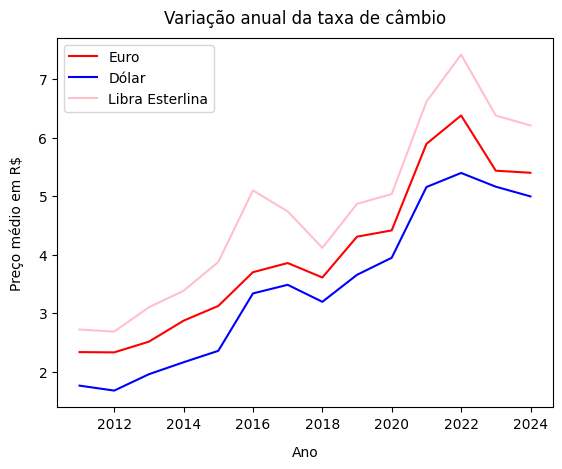

In [ ]:
# Definir 'Date' como índice para o DataFrame 'dolar'
dolar.set_index('Date', inplace=True)
# Resample anualmente e calcular a média para o DataFrame 'dolar'
dolar_resampled = dolar.resample('Y')['Price'].mean()

# Definir 'Data' como índice para o DataFrame 'euro'
euro.set_index('Data', inplace=True)
# Resample anualmente e calcular a média para o DataFrame 'euro'
euro_resampled = euro.resample('Y')['Último'].mean()

# Definir 'Data' como índice para o DataFrame 'libra'
libra.set_index('Data', inplace=True)
# Resample anualmente e calcular a média para o DataFrame 'libra'
libra_resampled = libra.resample('Y')['Último'].mean()

# Definir 'Data' como índice para o DataFrame 'yuan'
yuan.set_index('Data', inplace=True)
# Resample anualmente e calcular a média para o DataFrame 'yuan chines'
yuan_resampled = yuan.resample('Y')['Último'].mean()

# Definir 'Data' como índice para o DataFrame 'peso'
peso.set_index('Data', inplace=True)
# Resample anualmente e calcular a média para o DataFrame 'peso argentino'
peso_resampled = peso.resample('Y')['Último'].mean()

# Plotar o gráfico
plt.plot(euro_resampled.index, euro_resampled.values, color='red', label='Euro')
plt.plot(dolar_resampled.index, dolar_resampled.values, color='b', label='Dólar')
plt.plot(libra_resampled.index, libra_resampled.values, color='pink', label='Libra Esterlina')
#plt.plot(yuan_resampled.index, yuan_resampled.values, color='green', label='Yuan Chinês')
#plt.plot(peso_resampled.index, yuan_resampled.values, color='black', label='Peso Argentino')

# Título e rótulos dos eixos
plt.title("Variação anual da taxa de câmbio", pad=10)
plt.xlabel('Ano', labelpad=10)
plt.ylabel('Preço médio em R$', labelpad=10)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

## Dataframe - Commodities do Brasil em 2022

In [ ]:
#Filtrando as commodites de exportação
df_exp_b = df_brasil_2022[df_brasil_2022.Flow == 'Export']

#Coloquei _b pra designar o Brasil


#Selecionando as 5 maiores
top_com_exp_b= df_exp_b[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-5:,:]

top_com_exp_b['Commodities'] = ['Cereais', 'Petróleo 70%', 'Minério de Ferro', 'Petróleo bruto', 'Soja em grãos']

#Para ver os títulos das commodities
for i in range(5):
  print(top_com_exp_b.Commodity.iloc[i])

top_com_exp_b

In [ ]:
# Plotando as 5 maiores Commodities de Exportação
colors = ['gold', 'gold', 'green', 'green', 'green']

fig_b = px.bar( x = top_com_exp_b.Commodities, y = top_com_exp_b['Trade (USD)'],
              color=colors, color_discrete_map="identity",
              template = 'simple_white',
              text = ['12.2B', '12.3B', '25.7B', '42.7B', '46.7B'])
fig_b.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_b.update_layout(title = dict(text = 'Top 5 Commodities Exportadas no Brasil (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = 'Commodities'),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_b.add_annotation(x=1, y=40e9,
            text="Soja em grãos, Petróleo bruto", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)

fig_b.add_annotation(x=1, y=38e9,
            text=" e Minério de Ferro", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)

fig_b.add_annotation(x=1, y=36e9,
            text="foram as mais exportadas", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)
fig_b.show()

In [ ]:
#Filtrando as commodites de Importação
df_imp_b = df_brasil_2022[df_brasil_2022.Flow == 'Import']

#Selecionando as 5 maiores
top_com_imp_b= df_imp_b[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-5:,:]
top_com_imp_b['Commodities'] = ['Carvão', 'Petróleo leve', 'Fertilizantes', 'Óleos', 'Petróleo pesado']

#Para ver os títulos das commodities
for i in range(5):
  print(top_com_imp_b.Commodity.iloc[i])

top_com_imp_b

In [ ]:
#plotando as 5 maiores comodites de Importação

colors = ['gold', 'gold', 'green', 'green', 'green']

fig_b = px.bar(x = top_com_imp_b.Commodities, y = top_com_imp_b['Trade (USD)'],
              color=colors, color_discrete_map="identity",
              template = 'simple_white',
              text = ['5.4B', '7.4B', '9.4B', '10.1B', '17.3B'])
fig_b.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)

fig_b.update_layout(title = dict(text = 'Top 5 Commodities Importadas no Brasil (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = 'Commodities'),
              autosize=False,
              width=700,
              height=600)


fig_b.add_annotation(x='Fertilizers', y=17e9,
            text="Derivados de Petróleo,", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)

fig_b.add_annotation(x='Fertilizers', y=16e9,
            text="Petróleo Bruto e fertilizantes", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)

fig_b.add_annotation(x='Fertilizers', y=15e9,
            text="foram as mais importadas", font = dict(color = 'darkgreen', size = 20),
            showarrow=False)
fig_b.show()

## Dataframe - Commodities da China em 2022

In [ ]:
#Filtrando as commodites de exportação
df_exp_c = df_china_2022[df_china_2022.Flow == 'Export']

#Coloquei o _c pra designar a China

#Selecionando as 5 maiores
top_com_exp_c= df_exp_c[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-5:,:]

for i in range(5):
  print(top_com_exp_c['Commodity'].iloc[i])

top_com_exp_c['Commodities'] = ['Circuitos Integrados', 'Aparelhos de Comunicação', 'Circuitos de memória',
                                'Maquinas Automáticas', 'Acessórios de Celular']

top_com_exp_c

In [ ]:

# Plotando as 5 maiores Commodities de Exportação da China

color = ['gold', 'gold', 'red', 'red', 'red']

fig_c = px.bar( x = top_com_exp_c.Commodities, y = top_com_exp_c['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['52.2B', '52.9B', '70.3B', '127.7B', '138.8B'])
fig_c.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_c.update_layout(title = dict(text = 'Top 5 Commodities Exportadas na China (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = 'Commodities'),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_c.add_annotation(x=1.25, y=120e9,
            text="Acessórios de Celular,", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.add_annotation(x=1.25, y=114e9,
            text="Máquinas automáticas e", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.add_annotation(x=1.25, y=108e9,
            text="Circuitos de memória são as", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.add_annotation(x=1.25, y=102e9,
            text="commodities mais exportadas", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.show()

In [ ]:
#Filtrando as commodites de importação
df_imp_c = df_china_2022[df_china_2022.Flow == 'Import']

#Coloquei o _c pra designar a China

#Selecionando as 5 maiores
top_com_imp_c= df_imp_c[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-5:,:]

for i in range(5):
  print(top_com_imp_c['Commodity'].iloc[i])

top_com_imp_c['Commodities'] = ['Circuitos Eletrônicos', 'Circuitos de memória', 'Minérios de Ferro', 'Chips e Microchips', 'Óleos']

top_com_imp_c.tail(5)

In [ ]:
# Plotando as 5 maiores Commodities de Importação da China

color = ['gold', 'gold', 'red', 'red', 'red']


fig_c = px.bar( x = top_com_imp_c.Commodities, y = top_com_imp_c['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['93.9B', '101.3B', '125.5B', '205.1B', '365.5B'])
fig_c.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_c.update_layout(title = dict(text = 'Top 5 Commodities Importadas na China (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = ' '),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_c.add_annotation(x=1.5, y=295e9,
            text='Óleos, Circuitos Integrados', font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.add_annotation(x=1.5, y=270e9,
            text="e Minas de Ferro", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.add_annotation(x=1.5, y=245e9,
            text="são as commodities mais importadas", font = dict(color = 'darkred', size = 20),
            showarrow=False)

fig_c.show()

##Dataframe - Commodities dos EUA em 2022

In [ ]:
#Filtrando as commodites de exportação
df_exp_e = df_eua[df_eua.Flow == 'Export']

#Coloquei o _c pra designar a Argentina

#Selecionando as 5 maiores
top_eua_exp= df_exp_e.sort_values(by = 'Trade (USD)').iloc[-6:,:]

for i in range(6):
  print(top_eua_exp['Commodity'].iloc[i])

top_eua_exp['Commodities'] = ['Ouro não monetário', 'Gás natural', 'Derivados leves de Petróleo', 'Derivados pesados de Petróleo', 'Petróleo Bruto', 'Não Especificado']

top_eua_exp

In [ ]:
# Plotando as 5 maiores Commodities de Exportação da Argentina

color = ['blue', 'blue', 'red', 'red', 'red', '#E5E5E5']

fig_e = px.bar( x = top_eua_exp.Commodities, y = top_eua_exp['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['36.7B', '47.3B', '56.1B', '79.1B', '117.0B', '156.7B'])
fig_e.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_e.update_layout(title = dict(text = 'Top 5 Commodities Exportadas nos EUA (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = ' '),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_e.add_annotation(x=1.8, y=121e9,
            text="Petróleo Bruto,", font = dict(color = 'red', size = 20),
            showarrow=False)

fig_e.add_annotation(x=1.8, y=114e9,
            text="seus derivados pesados e leves", font = dict(color = 'red', size = 20),
            showarrow=False)

fig_e.add_annotation(x=1.8, y=106e9,
            text="são as mais exportadas", font = dict(color = 'red', size = 20),
            showarrow=False)

fig_e.show()

In [ ]:
#Filtrando as commodites de importação
df_imp_e = df_eua[df_eua.Flow == 'Import']

#Coloquei o _e pra designar os eua

#Selecionando as 5 maiores
top_eua_imp= df_imp_e.sort_values(by = 'Trade (USD)').iloc[-6:,:]

for i in range(6):
  print(top_eua_imp['Commodity'].iloc[i])

top_eua_imp['Commodities'] = ['Máquinas automáticas', 'Acessórios de telefone', 'Medicamentos', 'Veículos', 'Não especificada', 'Petróleo bruto']

top_eua_imp

In [ ]:
# Plotando as 5 maiores Commodities de Importação dos Eua

color = ['blue', 'blue', 'red', 'red', '#E5E5E5', 'red']

fig_e = px.bar( x = top_eua_imp.Commodities, y = top_eua_imp['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['54.5B', '66.1B', '72.7B', '83.7B', '117.3B', '204.7B'])
fig_e.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_e.update_layout(title = dict(text = 'Top 5 Commodities Importadas nos EUA (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = ' '),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_e.add_annotation(x=2.2, y=163e9,
            text="Petróleo bruto,", font = dict(color = 'red', size = 20),
            showarrow=False)

fig_e.add_annotation(x=2.2, y=154e9,
            text="Veículos e Medicamentos", font = dict(color = 'red', size = 20),
            showarrow=False)


fig_e.add_annotation(x=2.2, y=145e9,
            text="são as mais importadas", font = dict(color = 'red', size = 20),
            showarrow=False)

fig_e.show()

## Dataframe - Commodities da Argentina em 2022

In [ ]:
#Filtrando as commodites de exportação
df_exp_a = df_argentina_2022[df_argentina_2022.Flow == 'Export']

#Coloquei o _c pra designar a Argentina

#Selecionando as 5 maiores
top_com_exp_a= df_exp_a[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-6:,:]

for i in range(6):
  print(top_com_exp_a['Commodity'].iloc[i])

top_com_exp_a['Commodities'] = ['Trigo duro', 'Veículos', 'Óleos Vegetais', 'Milho', 'Derivados de Soja', 'Não Especificado']

top_com_exp_a

In [ ]:
# Plotando as 5 maiores Commodities de Exportação da Argentina

color = ['#87CEEB', '#87CEEB', 'deepskyblue', 'deepskyblue', 'deepskyblue', '#E5E5E5']

fig_a = px.bar( x = top_com_exp_a.Commodities, y = top_com_exp_a['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['4.0', '4.1B', '5.8B', '9.2B', '11.4B', '16.2B'])
fig_a.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_a.update_layout(title = dict(text = 'Top 5 Commodities Exportadas na Argentina (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = ' '),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_a.add_annotation(x=1.5, y=14e9,
            text="Derivados de Soja,", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1.5, y=13e9,
            text="Milho e", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1.5, y=12e9,
            text="Óleos Vegetais", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1.5, y=11e9,
            text="são as mais exportadas", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.show()

In [ ]:
#Filtrando as commodites de Importação
df_imp_a = df_argentina_2022[df_argentina_2022.Flow == 'Import']

#Coloquei o _a para designar a Argentina

#Selecionando as 5 maiores
top_com_imp_a= df_imp_a[['Commodity', 'Trade (USD)']].sort_values(by = 'Trade (USD)').iloc[-5:,:]

for i in range(5):
  print(top_com_imp_a['Commodity'].iloc[i])

top_com_imp_a['Commodities'] = ['Gás Natural', 'Acessórios de Celular', 'Grãos de Soja', 'Gás Natural (líquido)', 'Petróleo']

top_com_imp_a

In [ ]:
# Plotando as 5 maiores Commodities de Importação da Argentina

color = ['#87CEEB', '#87CEEB', 'deepskyblue', 'deepskyblue', 'deepskyblue']

fig_a = px.bar( x = top_com_imp_a.Commodities, y = top_com_imp_a['Trade (USD)'],
              color = color, color_discrete_map='identity',
              template = 'simple_white',
              text = ['1.7B', '1.7B', '2.1B', '2.6B', '5.7B'])
fig_a.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)


fig_a.update_layout(title = dict(text = 'Top 5 Commodities Importadas na Argentina (2022)', x = .5),
              yaxis = dict(title = 'Trade (USD)'),
              xaxis = dict(title = ' '),
              autosize=False,      #ajustando pro gráfico n ficar imenso na página
              width=700,
              height=600)

fig_a.add_annotation(x=1, y=5.6e9,
            text="Petróleo,", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1, y=5.3e9,
            text="Gás Natural (líquido) e ", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1, y=5e9,
            text="Grãos de Soja", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.add_annotation(x=1, y=4.7e9,
            text="são as mais importadas", font = dict(color = 'deepskyblue', size = 20),
            showarrow=False)

fig_a.show()

NameError: name 'top_com_imp_a' is not defined

## Dataframe Commodities Completo (2010-2022)

### Brasil: um campeão de Exp/Imp em 2022

In [ ]:
# Separando as exportações de todos os paises

export_2022 = df_completo[(df_completo.Year == 2022) & (df_completo.Flow == 'Export')].copy()
export_2022.drop(columns = ['Year', 'Flow', 'Continent', 'code', 'Quantity', 'Weight (kg)', 'Quantity Name'], inplace = True)
export_2022.head()

In [ ]:
# Selecionando só as commodities de exp do br

commodities_brasil_exp = export_2022[export_2022['Country or Area'] == 'Brazil'].Commodity.unique()
commodities_brasil_exp

In [ ]:
# Aqui fazemos um loop sobre cada commoditie do br e verificamos se, do data frame geral de commodities, o primeiro lugar do ranking
# é do br.

for commodity in minerios:
    try:
      if export_2022[export_2022.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
        print(commodity)
    except:
      pass

Foram 101 commodities, aqui alguns exemplos:
- Mate;
- Turbinas hidráulicas e rodas d'água com uma potência superior a 10 megawatts;
- Carnes congeladas como bovinos, suínos;
- Peixes, como atuns olho grande, tilápias;
- Suco de Laranja;
- Nozes como castanhas-do-para e castanha de caju;
- Gelatina (incluindo gelatina em folhas retangulares), e seus derivados.

In [ ]:
mate = export_2022[export_2022.Commodity == 'Mate'].sort_values('Trade (USD)', ascending = False).head().copy()
mate.reset_index(drop = True, inplace = True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mate['Trade (Mi US$)'] = mate['Trade (USD)']/1e6
mate.drop(columns = ['Trade (USD)'], inplace = True)
mate['Ranking'] = mate.index + 1
mate.set_index('Ranking', inplace = True)
mate_s = mate.style
mate_s.format({'Trade (Mi US$)': '{:,.2f}'}).bar(subset = 'Trade (Mi US$)', height=50, width=60,color = 'green')

In [ ]:
# Agora pra importações

import_2022 = df_completo[(df_completo.Year == 2022) & (df_completo.Flow == 'Import')].copy()
import_2022.drop(columns = ['Year', 'Flow', 'Continent', 'code', 'Quantity', 'Weight (kg)', 'Quantity Name'], inplace = True)
import_2022

In [ ]:
commodities_brasil_imp = import_2022[import_2022['Country or Area'] == 'Brazil'].Commodity.unique()
commodities_brasil_imp

In [ ]:
for commodity in commodities_brasil_imp:
    if import_2022[import_2022.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
        print(commodity)

Foram 136 commodities, aqui alguns exemplos:
- Peixes: sardinhas, alguns tubarões;
- Frutas: peras e damascos;
- Papel de jornal: em rolos ou folhas;
- Produtos alimentício preparados: de arroz, milho, trigo e batata.

In [ ]:
import re

# Leitura do arquivo'
file_path = 'commodities.txt'
with open(file_path, 'r') as file:
    commodities = file.readlines()

# Inicializando listas para grãos e minérios
graos = []
minerios = []

# Palavras-chave para identificar grãos e minérios
keywords_graos = ['wheat', 'corn', 'barley', 'oats', 'rice', 'soybeans', 'grain']
keywords_minerios = ['iron', 'copper', 'gold', 'silver', 'bauxite', 'aluminum', 'coal', 'ore']

# Compilando expressões regulares para correspondência exata de palavras
regex_graos = re.compile(r'\b(?:' + '|'.join(keywords_graos) + r')\b', re.IGNORECASE)
regex_minerios = re.compile(r'\b(?:' + '|'.join(keywords_minerios) + r')\b', re.IGNORECASE)

# Classificando as commodities
for commodity in commodities:
    if regex_graos.search(commodity):
        graos.append(commodity.strip())
    elif regex_minerios.search(commodity):
        minerios.append(commodity.strip())

# Exibindo as listas resultantes
print("Grãos:", graos, '\n\n\n\n\n\n\n\n')
print("Minérios:", minerios)

In [ ]:
# Filtrando com inteligência artificial para excluir derivados ou itens não relacionados

# Grãos
graos = [
    'Cereals; wheat and meslin, durum wheat, seed',
    'Cereals; wheat and meslin, durum wheat, other than seed',
    'Cereals; wheat and meslin, other than durum wheat, seed',
    'Cereals; wheat and meslin, other than durum wheat, other than seed',
    'Cereals; barley, other than seed',
    'Cereals; oats, seeds',
    'Cereals; oats, other than seed',
    'Cereals; maize (corn), seed',
    'Cereals; maize (corn), other than seed',
    'Cereals; rice in the husk (paddy or rough)',
    'Cereals; husked (brown) rice',
    'Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed',
    'Cereals; rice, broken',
    'Cereals; grain sorghum, seed',
    'Cereals; grain sorghum, other than seed',
    'Cereal grains; rolled or flaked, of oats',
    'Cereal grains; rolled or flaked, other than oats',
    'Cereal grains; worked (e.g. hulled, pearled, sliced or kibbled) of oats',
    'Cereal grains; worked (e.g. hulled, pearled, sliced or kibbled) of maize (corn)',
    'Cereal grains; worked, other than rolled or flaked (e.g. Hulled, pearled, sliced or kibbled) of cereals, excluding oats and maize, and rice of heading no.1006']

# Minerios

minerios = [
    "Iron pyrites; unroasted",
    "Iron ores and concentrates; non-agglomerated",
    "Iron ores and concentrates; agglomerated (excluding roasted iron pyrites)",
    "Copper ores and concentrates",
    "Silver ores and concentrates",
    "Precious metal ores and concentrates; (excluding silver)",
    "Iron oxides and hydroxides",
    "Earth colours; containing 70% or more by weight of combined iron evaluated as Fe2o3"
]

In [ ]:
# Criando dataframes separados para os mercados de grãos e minérios

filtro = [commodity in graos for commodity in df_completo['Commodity']]

df_graos = df_completo[filtro]

df_graos.Commodity.unique()

In [ ]:
# Criando dataframes separados para os mercados de grãos e minérios

filtro = [commodity in minerios for commodity in df_completo['Commodity']]

df_minerios = df_completo[filtro]

df_minerios.Commodity.unique()

In [ ]:
print(len(df_minerios.Commodity.unique()))
print(df_minerios.shape)
print(len(df_graos.Commodity.unique()))
print(df_graos.shape)

In [ ]:
# Criando dataframe de graos dividido por continentes

df_continent_graos = df_graos.groupby(['Continent', 'Year','Flow']).agg({'Trade (USD)': 'sum', 'Weight (kg)': 'sum', 'Quantity': 'sum'})
df_continent_graos

In [ ]:
# Criando dataframe de minerios dividido por continentes

df_continent_minerios = df_minerios.groupby(['Continent', 'Year','Flow']).agg({'Trade (USD)': 'sum', 'Weight (kg)': 'sum', 'Quantity': 'sum'})
df_continent_minerios

### Testes

In [ ]:
# Checando se o Brasil possui dados de commodities desde 1988
df_brasil = df_completo[df_completo['Country or Area'] == 'Brazil']
df_brasil.Year.value_counts()

# Percebemos que a grande massa dos dados está nos anos de 2010 a 2022,
#e portanto, a análise deve ser focada neste períod

Year
2022    9680
2019    9376
2021    9362
2020    9344
2018    9309
2017    9122
2012    9087
2013    9031
2011    9020
2016    9017
2014    9012
2010    8996
2015    8981
Name: count, dtype: int64

In [ ]:

# Excluindo todas as linhas em que year < 2010

df_completo = df_completo[df_completo['Year'] >= 2010]

# Teste

df_brasil = df_completo[df_completo['Country or Area'] == 'Brazil']
df_brasil.Year.value_counts()
df_brasil.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code,Continent
11762,Brazil,2022,"Horses; live, pure-bred breeding animals",Export,4608118.00,83647.00,No Quantity,NaN,1,South America
11763,Brazil,2022,"Horses; live, pure-bred breeding animals",Import,5776058.00,82110.00,Number of items,186.00,1,South America
11764,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Export,4214048.00,132206.64,No Quantity,NaN,1,South America
11765,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Import,3234706.00,49400.00,Number of items,104.00,1,South America
11766,Brazil,2022,Asses; live,Export,12111.00,NaN,No Quantity,NaN,1,South America


In [ ]:
# Identificando produtos relacionados com minério e grãos
# Criando documento escrito para análise

unique_commodities = df_brasil.Commodity.unique()

with open('commodities.txt', 'w') as f:
    for commodity in unique_commodities:
        f.write(f"{commodity}\n")

import re

# Leitura do arquivo
file_path = 'commodities.txt'
with open(file_path, 'r') as file:
    commodities = file.readlines()

# Inicializando listas para grãos e minérios
graos = []
minerios = []

# Palavras-chave para identificar grãos e minérios
keywords_graos = ['wheat', 'corn', 'barley', 'oats', 'rice', 'soybeans', 'grain']
keywords_minerios = ['iron', 'copper', 'gold', 'silver', 'bauxite', 'aluminum', 'coal', 'ore']

# Compilando expressões regulares para correspondência exata de palavras
regex_graos = re.compile(r'\b(?:' + '|'.join(keywords_graos) + r')\b', re.IGNORECASE)
regex_minerios = re.compile(r'\b(?:' + '|'.join(keywords_minerios) + r')\b', re.IGNORECASE)

# Classificando as commodities
for commodity in commodities:
    if regex_graos.search(commodity):
        graos.append(commodity.strip())
    elif regex_minerios.search(commodity):
        minerios.append(commodity.strip())

# Exibindo as listas resultantes
print("Grãos:", graos, '\n\n\n\n\n\n\n\n')
print("Minérios:", minerios)

Grãos: ['Cereals; wheat and meslin, durum wheat, seed', 'Cereals; wheat and meslin, durum wheat, other than seed', 'Cereals; wheat and meslin, other than durum wheat, seed', 'Cereals; wheat and meslin, other than durum wheat, other than seed', 'Cereals; barley, other than seed', 'Cereals; oats, seeds', 'Cereals; oats, other than seed', 'Cereals; maize (corn), seed', 'Cereals; maize (corn), other than seed', 'Cereals; rice in the husk (paddy or rough)', 'Cereals; husked (brown) rice', 'Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed', 'Cereals; rice, broken', 'Cereals; grain sorghum, seed', 'Cereals; grain sorghum, other than seed', 'Cereals; barley, seed', 'Durum wheat', 'Wheat other than durum wheat; meslin', 'Barley', 'Oats', 'Grain sorghum', 'Wheat or meslin flour', 'Cereal flour; of maize (corn)', 'Cereal flours; other than wheat, meslin, and maize (corn)', 'Cereal groats and meal; of wheat', 'Cereal groats and meal; of maize (corn)', 'Cereal grains; 

In [ ]:
# Criando dataframes separados para os mercados de grãos e minérios

filtro = [commodity in graos for commodity in df_completo['Commodity']]

df_graos = df_completo[filtro]

df_graos.Commodity.unique()

array(['Cereals; barley, seed',
       'Cereals; wheat and meslin, other than durum wheat, seed',
       'Durum wheat', 'Barley', 'Grain sorghum',
       'Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed',
       'Cereals; wheat and meslin, durum wheat, other than seed',
       'Cereals; wheat and meslin, other than durum wheat, other than seed',
       'Cereals; barley, other than seed',
       'Cereals; oats, other than seed', 'Cereals; maize (corn), seed',
       'Cereals; maize (corn), other than seed',
       'Cereals; husked (brown) rice',
       'Cereals; rice in the husk (paddy or rough)',
       'Cereals; rice, broken',
       'Cereals; wheat and meslin, durum wheat, seed',
       'Cereals; oats, seeds', 'Wheat other than durum wheat; meslin',
       'Oats', 'Cereals; grain sorghum, seed',
       'Cereals; grain sorghum, other than seed', 'Wheat or meslin flour',
       'Cereal flour; of maize (corn)',
       'Cereal flours; other than wheat, mesl

In [ ]:
# Criando dataframes separados para os mercados de grãos e minérios

filtro = [commodity in minerios for commodity in df_completo['Commodity']]

df_minerios = df_completo[filtro]

df_minerios.Commodity.unique()



array(['Dried herrings, anchovies, sardines, sardinella, brisling or sprats, mackerel (incl Indian, jack, or horse), seerfishes, jacks, crevalles, cobia, silver pomfrets, Pacific saury, scads, capelin, swordfish, Kawakawa, bonitos, marlins, sailfishes, spearfish',
       'Iron pyrites; unroasted',
       'Iron ores and concentrates; non-agglomerated',
       'Slag, granulated (slag sand); from the manufacture or iron or steel',
       'Copper ores and concentrates',
       'Precious metal ores and concentrates; (excluding silver)',
       'Slag, dross; (other than granulated slag), scalings and other waste from the manufacture of iron or steel',
       'Iron pyrites; roasted',
       'Slag, ash and residues; (not from the manufacture of iron or steel), containing mainly copper',
       'Slag, ash and residues; (not from the manufacture of iron or steel), containing mainly metals or their compounds, n.e.c. in heading no. 2620',
       'Slag, ash and residues; (not from the manufacture o

In [ ]:
print(len(df_minerios.Commodity.unique()))
print(df_minerios.shape)
print(len(df_graos.Commodity.unique()))
print(df_graos.shape)

322
(334634, 10)
51
(90395, 10)


In [ ]:
df_minerios_2022_e = df_minerios[(df_minerios.Year == 2022) & (df_minerios.Flow == 'Export')].copy()
df_minerios_2022_i = df_minerios[(df_minerios.Year == 2022) & (df_minerios.Flow == 'Import')].copy()
df_minerios_2022_i

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code,Continent
206788,China,2022,"Dried herrings, anchovies, sardines, sardinell...",Import,25774144.00,14173875.00,Weight in kilograms,14173875.00,3,Asia
213380,EU-28,2022,"Dried herrings, anchovies, sardines, sardinell...",Import,1088552.17,166998.58,Weight in kilograms,166998.58,3,NaN
219942,France,2022,"Dried herrings, anchovies, sardines, sardinell...",Import,708112.02,112763.00,Weight in kilograms,112763.00,3,Europe
227689,Germany,2022,"Dried herrings, anchovies, sardines, sardinell...",Import,837364.26,143246.00,Weight in kilograms,143246.00,3,Europe
235756,Italy,2022,"Dried herrings, anchovies, sardines, sardinell...",Import,589640.89,33899.00,Weight in kilograms,33899.00,3,Europe
...,...,...,...,...,...,...,...,...,...,...
6813382,Poland,2022,"Watch straps, watch bands, watch bracelets, an...",Import,2216421.00,26246.89,Weight in kilograms,26246.89,91,Europe
6814592,Portugal,2022,"Watch cases; of base metal, whether or not gol...",Import,63856.87,160.05,Number of items,3392.00,91,Europe
6814603,Portugal,2022,"Watch straps, watch bands, watch bracelets, an...",Import,8601887.76,18584.96,Weight in kilograms,18584.96,91,Europe
6815727,Qatar,2022,"Watch cases; of base metal, whether or not gol...",Import,53718.47,159.42,Number of items,13.00,91,Asia


In [ ]:
for commodity in df_minerios_2022_e.Commodity.unique():
  try:
    if df_minerios_2022_e[df_minerios_2022_e.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
          print('1', commodity)
  except:
    pass


1 Iron; non-alloy pig iron containing by weight 0.5% or less of phosphorus, in pigs, blocks or other primary forms
1 Iron or non-alloy steel; semi-finished products of iron or non-alloy steel; containing by weight less than 0.25% of carbon, of rectangular (other than square) cross-section
1 Iron or non-alloy steel; semi-finished products of iron or non-alloy steel, containing by weight 0.25% or more of carbon
1 Iron or steel (excluding cast iron); casing of a kind used in drilling for oil or gas (not seamless), having circular cross-sections, external diameter exceeds 406.4mm


In [ ]:
for commodity in df_minerios_2022_i.Commodity.unique():
  try:
    if df_minerios_2022_i[df_minerios_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
          print('1', commodity)
    elif df_minerios_2022_i[df_minerios_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[1, 0] == 'Brazil':
          print('2', commodity)
    elif df_minerios_2022_i[df_minerios_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[2, 0] == 'Brazil':
          print('3', commodity)
  except:
    pass


3 Coke and semi-coke; of coal, lignite or peat, whether or not agglomerated; retort carbon
3 Pitch; obtained from coal tar or from other mineral tars
3 Iron or non-alloy steel; flat-rolled, width 600mm or more, plated or coated with aluminium zinc-alloys
2 Iron or steel, railway or tramway track construction material; rails
2 Iron or steel (excluding cast iron or stainless steel); seamless, line pipe of a kind used for oil or gas pipelines
2 Iron or steel (excluding cast iron); casing and tubing of a kind used in drilling for oil and gas (other than stainless steel or seamless), n.e.c. in chapter 73
3 Iron; grinding balls and similar articles for mills, other than of non-malleable cast iron
2 Iron or steel; grinding balls and similar articles for mills, forged or stamped, but not further worked
2 Iron or steel (excluding cast iron); casing of a kind used in drilling for oil or gas (not seamless), having circular cross-sections, external diameter exceeds 406.4mm


In [ ]:
df_graos_2022_e = df_graos[(df_graos.Year == 2022) & (df_graos.Flow == 'Export')].copy()
df_graos_2022_i = df_graos[(df_graos.Year == 2022) & (df_graos.Flow == 'Import')].copy()
df_graos_2022_i

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code,Continent
836315,Albania,2022,"Cereals; rice, semi-milled or wholly milled, w...",Import,69514.23,30362.66,Weight in kilograms,30362.66,10,Europe
837122,Andorra,2022,"Cereals; wheat and meslin, durum wheat, other ...",Import,13386.90,23840.00,Weight in kilograms,23840.00,10,Europe
837123,Andorra,2022,"Cereals; wheat and meslin, other than durum wh...",Import,15461.31,37600.00,Weight in kilograms,37600.00,10,Europe
837124,Andorra,2022,"Cereals; wheat and meslin, other than durum wh...",Import,2044.71,4743.47,Weight in kilograms,4743.47,10,Europe
837126,Andorra,2022,"Cereals; barley, other than seed",Import,62919.68,384495.76,Weight in kilograms,384495.76,10,Europe
...,...,...,...,...,...,...,...,...,...,...
6252533,"China, Hong Kong SAR",2022,"Machines; parts of those for cleaning, sorting...",Import,28813.05,129.00,Weight in kilograms,129.00,84,NaN
6272137,France,2022,"Machines; for cleaning, sorting or grading see...",Import,11163554.92,688424.26,Number of items,1893.00,84,Europe
6272142,France,2022,"Machines; parts of those for cleaning, sorting...",Import,13435209.32,796207.25,Weight in kilograms,796207.25,84,Europe
6285430,Germany,2022,"Machines; for cleaning, sorting or grading see...",Import,16415923.49,694922.39,No Quantity,NaN,84,Europe


In [ ]:
for commodity in df_graos_2022_e.Commodity.unique():
  try:
    if   df_graos_2022_e[df_graos_2022_e.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
          print('1', commodity)
    elif df_graos_2022_e[df_graos_2022_e.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[1, 0] == 'Brazil':
          print('2', commodity)
    elif df_graos_2022_e[df_graos_2022_e.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[2, 0] == 'Brazil':
          print('3', commodity)
  except:
    pass

1 Cereals; maize (corn), other than seed
1 Cereals; rice in the husk (paddy or rough)
2 Vegetable oils; maize (corn) oil and its fractions, crude, not chemically modified
1 Bran, sharps and other residues; of maize (corn), whether or not in the form of pellets, derived from the sifting, milling or other workings thereof


In [ ]:
milho = df_graos_2022_e[df_graos_2022_e.Commodity == 'Vegetable oils; maize (corn) oil and its fractions, crude, not chemically modified'].sort_values('Trade (USD)', ascending = False).head()[['Country or Area',\
                      'Trade (USD)']].copy()
milho.reset_index(drop = True, inplace = True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
milho['Trade (Bi US$)'] = milho['Trade (USD)']/1e9
milho.drop(columns = ['Trade (USD)'], inplace = True)
milho['Ranking'] = milho.index + 1
milho.set_index('Ranking', inplace = True)
milho_s = milho.style
milho_s.format({'Trade (Bi US$)': '{:,.2f}'}).bar(subset = 'Trade (Bi US$)', height=50, width=60,color = 'green')

,Country or Area,Trade (Bi US$)
Ranking,,
1,USA,0.12
2,Brazil,0.06
3,Hungary,0.04
4,Canada,0.03
5,France,0.02


In [ ]:
for commodity in df_graos_2022_i.Commodity.unique():
  try:
    if   df_graos_2022_i[df_graos_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[0, 0] == 'Brazil':
          print('1', commodity)
    elif df_graos_2022_i[df_graos_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[1, 0] == 'Brazil':
          print('2', commodity)
    elif df_graos_2022_i[df_graos_2022_i.Commodity == f'{commodity}'].sort_values('Trade (USD)', ascending = False).iloc[2, 0] == 'Brazil':
          print('3', commodity)
  except:
    pass

3 Wheat or meslin flour
3 Machines; for cleaning, sorting or grading seed, grain or dried leguminous vegetables


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px

tickers = ['IRM', 'CORN']

#Baixa e arruma o DataFrame
dados = yf.download(tickers, start = '2019-01-01', end = '2024-07-04')
dados = dados.stack().reset_index()
dados.columns.name = None

ferro = dados[dados.Ticker == 'IRM']
ferro['Change'] = ferro.Open.diff()
ferro['Porcentage'] = ferro.Change / ferro.Open


milho = dados[dados.Ticker == 'CORN']
milho['Change'] = dados.Open.diff()
milho['Porcentage'] = milho.Change / milho.Open
milho

[*********************100%%**********************]  2 of 2 completed
<ipython-input-106-f04bf0d664ef>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-f04bf0d664ef>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-f04bf0d664ef>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Change,Porcentage
0,2019-01-02,CORN,16.12,16.12,16.17,16.03,16.10,9700,NaN,NaN
2,2019-01-03,CORN,16.25,16.25,16.28,16.14,16.14,135500,-15.86,-0.98
4,2019-01-04,CORN,16.40,16.40,16.40,16.28,16.28,90600,-15.71,-0.96
6,2019-01-07,CORN,16.40,16.40,16.42,16.35,16.42,41100,-16.37,-1.00
8,2019-01-08,CORN,16.33,16.33,16.44,16.28,16.43,147100,-16.84,-1.02
...,...,...,...,...,...,...,...,...,...,...
2760,2024-06-27,CORN,18.72,18.72,18.87,18.69,18.81,76500,-69.24,-3.68
2762,2024-06-28,CORN,18.31,18.31,19.07,18.03,18.76,131400,-70.38,-3.75
2764,2024-07-01,CORN,18.36,18.36,18.38,18.12,18.18,60300,-71.32,-3.92
2766,2024-07-02,CORN,18.33,18.33,18.55,18.28,18.41,85300,-70.89,-3.85


In [ ]:
milho['Data']  = milho.Date.astype('str')
milho['Month'] = milho.Data.str[:-3]
milho['Year'] = milho.Data.str[:4]
milho.drop(columns = ['Ticker'], inplace = True)
milho.Year = milho.Year.astype('int32')
milho['Mes'] = milho.Month.str[-2:]
milho.Month = pd.to_datetime(milho.Month)
milho.Mes= milho.Mes.astype('int32')
milho.Month = milho.Month.dt.strftime('%Y-%m')

milho

<ipython-input-107-027e9e8b67d2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-027e9e8b67d2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-027e9e8b67d2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-027

,Date,Adj Close,Close,High,Low,Open,Volume,Change,Porcentage,Data,Month,Year,Mes
0,2019-01-02,16.12,16.12,16.17,16.03,16.10,9700,NaN,NaN,2019-01-02,2019-01,2019,1
2,2019-01-03,16.25,16.25,16.28,16.14,16.14,135500,-15.86,-0.98,2019-01-03,2019-01,2019,1
4,2019-01-04,16.40,16.40,16.40,16.28,16.28,90600,-15.71,-0.96,2019-01-04,2019-01,2019,1
6,2019-01-07,16.40,16.40,16.42,16.35,16.42,41100,-16.37,-1.00,2019-01-07,2019-01,2019,1
8,2019-01-08,16.33,16.33,16.44,16.28,16.43,147100,-16.84,-1.02,2019-01-08,2019-01,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,2024-06-27,18.72,18.72,18.87,18.69,18.81,76500,-69.24,-3.68,2024-06-27,2024-06,2024,6
2762,2024-06-28,18.31,18.31,19.07,18.03,18.76,131400,-70.38,-3.75,2024-06-28,2024-06,2024,6
2764,2024-07-01,18.36,18.36,18.38,18.12,18.18,60300,-71.32,-3.92,2024-07-01,2024-07,2024,7
2766,2024-07-02,18.33,18.33,18.55,18.28,18.41,85300,-70.89,-3.85,2024-07-02,2024-07,2024,7


In [ ]:
milho_agrupado = milho.groupby('Month').mean(numeric_only = True)
milho_agrupado.Year = milho_agrupado.Year.astype('int32')
anos = milho_agrupado.Year
milho_agrupado = milho.groupby('Month').mean(numeric_only = True)
milho_agrupado.Mes = milho_agrupado.Mes.astype('int32')
meses = milho_agrupado.Mes
milho_agrupado = milho.groupby('Month').sum(numeric_only = True)
milho_agrupado.Year = anos
milho_agrupado.Mes = meses
milho_agrupado

,Adj Close,Close,High,Low,Open,Volume,Change,Porcentage,Year,Mes
Month,,,,,,,,,,
2019-01,341.69,341.69,342.97,340.23,341.86,871400,-367.97,-22.59,2019,1
2019-02,305.82,305.82,307.63,304.97,306.75,876500,-378.47,-23.44,2019,2
2019-03,330.21,330.21,332.31,328.51,331.11,1226600,-406.55,-25.79,2019,3
2019-04,320.14,320.14,321.72,318.72,320.67,1287600,-427.60,-28.00,2019,4
2019-05,343.10,343.10,345.49,339.89,342.13,4100600,-352.21,-22.72,2019,5
...,...,...,...,...,...,...,...,...,...,...
2024-03,397.43,397.43,399.67,394.13,396.24,1704000,-1193.40,-60.24,2024,3
2024-04,437.62,437.62,439.83,434.68,437.54,1613900,-1264.07,-63.56,2024,4
2024-05,451.57,451.57,454.74,448.75,451.69,2453900,-1299.48,-63.30,2024,5


In [ ]:
fig = px.line(x = milho_agrupado.index, y = milho_agrupado.Open, color = milho_agrupado.Year, text = milho_agrupado.Mes )
fig.update_layout(title={'text': 'Análise sazonal da cotação do milho','x': .5, 'font': {'size': 20}})
fig.update_xaxes(title = 'Anos', tickfont={'size':14})
fig.update_traces(textposition='top center')
fig.update_yaxes(title = 'Volume do milho', tickfont={'size':14})
fig.show()

In [ ]:
import plotly.express as px

fig = px.line(x = milho_agrupado.index, y = milho_agrupado.Volume, color = milho_agrupado.Year, text = milho_agrupado.Mes )
fig.update_layout(title={'text': 'Análise sazonal do volume do milho (bushel)','x': .5, 'font': {'size': 20}})
fig.update_xaxes(title = 'Anos', tickfont={'size':14})
fig.update_traces(textposition='top center')
fig.update_yaxes(title = 'Volume do milho', tickfont={'size':14})
fig.show()

### Separando Dataframes para cambio

In [ ]:
df_imp_graos = df_graos[(df_graos['Country or Area'] == 'Brazil') & (df_graos['Flow'] == 'Import')]
df_imp_graos

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code,Continent
850365,Brazil,2022,"Cereals; wheat and meslin, durum wheat, seed",Import,514943.00,960160.00,Weight in kilograms,960160.00,10,South America
850367,Brazil,2022,"Cereals; wheat and meslin, durum wheat, other ...",Import,26741897.00,53000030.00,Weight in kilograms,53000030.00,10,South America
850370,Brazil,2022,"Cereals; wheat and meslin, other than durum wh...",Import,2236894911.00,5662631950.00,Weight in kilograms,5662631950.00,10,South America
850374,Brazil,2022,"Cereals; barley, other than seed",Import,266741963.00,658546460.00,Weight in kilograms,658546460.00,10,South America
850376,Brazil,2022,"Cereals; oats, seeds",Import,34115.00,65000.00,Weight in kilograms,65000.00,10,South America
...,...,...,...,...,...,...,...,...,...,...
6236427,Brazil,2012,"Machines; parts of those for cleaning, sorting...",Import,8694472.00,917576.31,Weight in kilograms,917616.31,84,South America
6237404,Brazil,2011,"Machines; for cleaning, sorting or grading see...",Import,11217427.00,526964.00,Number of items,768.00,84,South America
6237408,Brazil,2011,"Machines; parts of those for cleaning, sorting...",Import,7498046.00,1046488.52,Weight in kilograms,1046261.52,84,South America
6238388,Brazil,2010,"Machines; for cleaning, sorting or grading see...",Import,7175510.00,366864.00,Number of items,2091.94,84,South America


In [ ]:
df_exp_graos = df_graos[(df_graos['Country or Area'] == 'Brazil') & (df_graos['Flow'] == 'Export')]
df_exp_graos

In [ ]:
df_imp_minerios = df_minerios[(df_minerios['Country or Area'] == 'Brazil') & (df_minerios['Flow'] == 'Import')]
df_imp_minerios.head()

In [ ]:
df_exp_minerios = df_minerios[(df_minerios['Country or Area'] == 'Brazil') & (df_minerios['Flow'] == 'Export')]
df_exp_minerios.head()

#### Gráfico importação de grãos

In [ ]:
df_imp_graos_dolar = pd.merge(df_imp_graos, taxa_media_anual, left_on='Year', right_on='Ano')
df_imp_graos_dolar['Importação em Reais'] = df_imp_graos_dolar['Trade (USD)'] * df_imp_graos_dolar['Price']

df_imp_graos_dolar.head()

In [ ]:
df_imp_graos_dolar['Importação em Reais'] = df_imp_graos_dolar['Trade (USD)'] * df_imp_graos_dolar['Price']
df_imp_graos_dolar

In [ ]:
# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_imp_graos['Year'], df_imp_graos['Trade (USD)'], marker='o', linestyle='-', color='b', label='Importações em Dólares')
plt.plot(df_imp_graos_dolar['Year'], df_imp_graos_dolar['Importação em Reais'], marker='o', linestyle='-', color='bLACK', label='Importações em Reais')
plt.title('Importações de Grãos para o Brasil por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total')
plt.xticks(df_imp_graos['Year'])  # Garantir que todos os anos sejam exibidos no eixo x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## União Europeia



### Exportação

In [ ]:
url_ue = 'https://raw.githubusercontent.com/BibianaStumpf/Teste/main/EXP_ANUAL_UNI%C3%83O%20EUROPEIA%20-%20UE%20(2).xlsx%20-%20Sheet%201.csv'
df_ue = pd.read_csv (url_ue)
df_ue.head()

In [ ]:
df_ue = df_ue.iloc[7:]
df_ue = df_ue.iloc[:-1]
df_ue.rename(columns={'Ministério do Desenvolvimento, Indústria, Comércio e Serviços': 'Data', 'Unnamed: 1': 'Valor', 'Unnamed: 2': 'Var. (%) Igual Período do Ano Anterior', "Unnamed: 3":"Part. (%) no Total Brasil"}, inplace=True)
df_ue

In [ ]:
ue = {2022: 15.2, 2015: 15.4, 2010: 18.7}

china = {2022: 26.8, 2015: 18.6, 2010: 15.2}

eua = {2022: 11.4, 2015: 13.4, 2010: 10.0}

argentina = {2022: 4.6, 2015: 6.7, 2010: 9.2}

In [ ]:
# Organizando os dados para plotagem
anos = [2010, 2015, 2022]
valores_anos = {
    2010: {'UE': ue[2010], 'China': china[2010], 'United States': eua[2010]},
    2015: {'UE': ue[2015], 'China': china[2015], 'United States': eua[2015]},
    2022: {'UE': ue[2022], 'China': china[2022], 'United States': eua[2022]}
}

# Criando os gráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotando para cada ano
for i, ano in enumerate(anos):
    ax = axs[i]

    # Obtendo os valores de exportação para o ano atual e ordenando de forma decrescente
    valores_ordenados = sorted(valores_anos[ano].items(), key=lambda x: x[1], reverse=True)
    paises = [v[0] for v in valores_ordenados]
    valores = [v[1] for v in valores_ordenados]

    # Plotando as barras
    bars = ax.bar(paises, valores, color=['blue', 'blue', 'blue'])
    ax.set_title(f'Ano {ano}')

    # Adicionando os valores acima das barras
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Adicionando números do eixo y e legenda do eixo y
    axs[i].set_ylabel('Valor exportado (%)')
    axs[i].set_yticks(range(0, 31, 5))  # Definindo os ticks do eixo y
    axs[i].set_ylim(0, 30)
    axs[i].tick_params(axis='x', rotation=45)

# Ajustes finais
plt.suptitle('Exportações por Ano (em bilhões de dólares)')
plt.tight_layout()
plt.show()

### Importação

In [ ]:
import pandas as pd

In [ ]:
url_ue_imp = 'https://raw.githubusercontent.com/BibianaStumpf/Teste/main/IMP_ANUAL_UNI%C3%83O%20EUROPEIA%20-%20UE.xlsx%20-%20Sheet%201.csv'
df_ue_imp = pd.read_csv (url_ue_imp)
df_ue_imp.head()

In [ ]:
df_ue_imp = df_ue_imp.iloc[7:]
df_ue_imp = df_ue_imp.iloc[:-1]
df_ue_imp.rename(columns={'Ministério do Desenvolvimento, Indústria, Comércio e Serviços': 'Data', 'Unnamed: 1': 'Valor', 'Unnamed: 2': 'Var. (%) Igual Período do Ano Anterior', "Unnamed: 3":"Part. (%) no Total Brasil"}, inplace=True)
df_ue_imp

In [ ]:
ue = {2022: 16.2, 2015: 19.5, 2010: 19.6}

china = {2022: 23.2, 2015: 17.9, 2010: 14.1}

eua = {2022: 18.6, 2015: 15.6, 2010: 15.0}

argentina = {2022: 4.7, 2015: 6, 2010: 7.9}

In [ ]:
# Organizando os dados para plotagem
anos = [2010, 2015, 2022]
valores_anos = {
    2010: {'UE': ue[2010], 'China': china[2010], 'United States': eua[2010]},
    2015: {'UE': ue[2015], 'China': china[2015], 'United States': eua[2015]},
    2022: {'UE': ue[2022], 'China': china[2022], 'United States': eua[2022]}
}

# Criando os gráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotando para cada ano
for i, ano in enumerate(anos):
    ax = axs[i]

    # Obtendo os valores de importação para o ano atual e ordenando de forma decrescente
    valores_ordenados = sorted(valores_anos[ano].items(), key=lambda x: x[1], reverse=True)
    paises = [v[0] for v in valores_ordenados]
    valores = [v[1] for v in valores_ordenados]

    # Plotando as barras
    bars = ax.bar(paises, valores, color=['blue', 'blue', 'blue'])
    ax.set_title(f'Ano {ano}')

    # Adicionando os valores acima das barras
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Adicionando números do eixo y e legenda do eixo y
    axs[i].set_ylabel('Valor importado (%)')
    axs[i].set_yticks(range(0, 31, 5))  # Definindo os ticks do eixo y
    axs[i].set_ylim(0, 30)
    axs[i].tick_params(axis='x', rotation=45)

# Ajustes finais
plt.suptitle('Importações por Ano (em bilhões de dólares)')
plt.tight_layout()
plt.show()